# Analyze ups and downs in the market and predict future stock price returns based on Indian Market data from 2000 to 2020.

Dataset Link: https://www.kaggle.com/datasets/sagara9595/stock-data

Group Members:

Arti Yuvraj Karche (2441031)

Amruta Prakash Deokate (2441029)

Sejal Bhausaheb Talekar (2441030)

Anushka Atul Shah (2441032)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('ADANIPORTS.csv')
df.head() 

Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0  2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1  2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2  2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3  2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4  2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     NaN             9859619   
1  893.90  941.38   4581338  4.312765e+14     NaN             1453278   
2  884.20  888.09   5124121  4.550658e+14     NaN             1069678   
3  921.55  929.17   4609762  4.283257e+14     NaN             1260913   
4  969.30  965.65   2977470  2.875200e+14     NaN              816123   

   %Deliverble  
0       0.3612  
1       0.3172  
2       0.2088  
3       0.2735  
4       0.2741

# Data Preprocessing

In [3]:
df.shape

(3322, 15)

In [4]:
df.tail()

Date      Symbol Series  Prev Close   Open    High     Low   Last  \
3317  2021-04-26  ADANIPORTS     EQ      725.35  733.0  739.65  728.90  729.2   
3318  2021-04-27  ADANIPORTS     EQ      730.75  735.0  757.50  727.35  748.6   
3319  2021-04-28  ADANIPORTS     EQ      749.15  755.0  760.00  741.10  743.4   
3320  2021-04-29  ADANIPORTS     EQ      746.25  753.2  765.85  743.40  746.4   
3321  2021-04-30  ADANIPORTS     EQ      746.75  739.0  759.45  724.50  726.4   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
3317  730.75  733.25   9390549  6.885658e+14  116457.0              838079   
3318  749.15  747.67  20573107  1.538191e+15  236896.0             1779639   
3319  746.25  751.02  11156977  8.379106e+14  130847.0             1342353   
3320  746.75  753.06  13851910  1.043139e+15  153293.0             1304895   
3321  730.05  743.35  12600934  9.366911e+14  132141.0             3514692   

      %Deliverble  
3317       0.0892  
3318       0.0865  
3319       0.1203  
3320       0.0942  
3321       0.2789

In [5]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3322 entries, 0 to 3321
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3322 non-null   object 
 1   Symbol              3322 non-null   object 
 2   Series              3322 non-null   object 
 3   Prev Close          3322 non-null   float64
 4   Open                3322 non-null   float64
 5   High                3322 non-null   float64
 6   Low                 3322 non-null   float64
 7   Last                3322 non-null   float64
 8   Close               3322 non-null   float64
 9   VWAP                3322 non-null   float64
 10  Volume              3322 non-null   int64  
 11  Turnover            3322 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3322 non-null   int64  
 14  %Deliverble         3322 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 389.4

In [7]:
df.describe()

Prev Close         Open         High          Low         Last  \
count  3322.000000  3322.000000  3322.000000  3322.000000  3322.000000   
mean    344.114314   344.763019   351.608007   337.531969   344.239539   
std     192.936882   193.619992   198.617808   188.676614   193.187813   
min     108.000000   108.000000   110.450000   105.650000   108.000000   
25%     164.312500   164.850000   168.000000   161.600000   164.075000   
50%     324.700000   325.750000   331.275000   319.850000   325.000000   
75%     400.912500   401.000000   407.187500   395.000000   400.912500   
max    1307.450000  1310.250000  1324.000000  1270.000000  1308.000000   

             Close         VWAP        Volume      Turnover        Trades  \
count  3322.000000  3322.000000  3.322000e+03  3.322000e+03  2.456000e+03   
mean    344.201626   344.853182  2.954564e+06  1.070144e+14  4.492259e+04   
std     193.045886   193.841305  4.104227e+06  2.625564e+14  5.023124e+04   
min     108.000000   108.340000  1.236600e+04  2.415857e+11  3.660000e+02   
25%     164.312500   164.855000  7.493682e+05  1.817650e+13  2.083200e+04   
50%     324.700000   325.765000  2.007292e+06  5.836041e+13  3.588150e+04   
75%     400.912500   400.607500  3.636883e+06  1.158526e+14  5.336875e+04   
max    1307.450000  1302.150000  9.771788e+07  8.160988e+15  1.205984e+06   

       Deliverable Volume  %Deliverble  
count        3.322000e+03  3322.000000  
mean         1.207441e+06     0.445899  
std          1.398640e+06     0.160496  
min          5.383000e+03     0.067000  
25%          3.212005e+05     0.332900  
50%          8.132775e+05     0.445650  
75%          1.605528e+06     0.555850  
max          2.241652e+07     0.979800

In [8]:
print(df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [9]:
df["Symbol"].unique()

array(['MUNDRAPORT', 'ADANIPORTS'], dtype=object)

In [10]:
df.duplicated().sum()

0

In [11]:
unique_dates = df['Date'].unique()
print(f"Number of unique dates: {len(unique_dates)}")
print("Unique dates:", unique_dates)

Number of unique dates: 3322
Unique dates: ['2007-11-27' '2007-11-28' '2007-11-29' ... '2021-04-28' '2021-04-29'
 '2021-04-30']


In [12]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                866
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [13]:
df['Trades'].fillna(0, inplace=True)

In [14]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume             int64
%Deliverble                  float64
dtype: object

In [16]:
df['Price_Change'] = df['Close'].pct_change()  
df.head()

Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0 2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1 2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2 2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3 2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4 2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     0.0             9859619   
1  893.90  941.38   4581338  4.312765e+14     0.0             1453278   
2  884.20  888.09   5124121  4.550658e+14     0.0             1069678   
3  921.55  929.17   4609762  4.283257e+14     0.0             1260913   
4  969.30  965.65   2977470  2.875200e+14     0.0              816123   

   %Deliverble  Price_Change  
0       0.3612           NaN  
1       0.3172     -0.071659  
2       0.2088     -0.010851  
3       0.2735      0.042242  
4       0.2741      0.051815

In [17]:
df['Price_Change'].fillna(np.mean(df['Price_Change']), inplace = True)
df.head()

Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0 2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1 2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2 2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3 2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4 2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     0.0             9859619   
1  893.90  941.38   4581338  4.312765e+14     0.0             1453278   
2  884.20  888.09   5124121  4.550658e+14     0.0             1069678   
3  921.55  929.17   4609762  4.283257e+14     0.0             1260913   
4  969.30  965.65   2977470  2.875200e+14     0.0              816123   

   %Deliverble  Price_Change  
0       0.3612      0.000526  
1       0.3172     -0.071659  
2       0.2088     -0.010851  
3       0.2735      0.042242  
4       0.2741      0.051815

In [18]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [19]:
df.head()

Date      Symbol Series  Prev Close    Open     High    Low   Last  \
0 2007-11-27  MUNDRAPORT     EQ      440.00  770.00  1050.00  770.0  959.0   
1 2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.0  885.0   
2 2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.0  887.0   
3 2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.0  929.0   
4 2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.0  980.0   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  962.90  984.72  27294366  2.687719e+15     0.0             9859619   
1  893.90  941.38   4581338  4.312765e+14     0.0             1453278   
2  884.20  888.09   5124121  4.550658e+14     0.0             1069678   
3  921.55  929.17   4609762  4.283257e+14     0.0             1260913   
4  969.30  965.65   2977470  2.875200e+14     0.0              816123   

   %Deliverble  Price_Change  Year  Month  Day  
0       0.3612      0.000526  2007     11   27  
1       0.3172     -0.071659  2007     11   28  
2       0.2088     -0.010851  2007     11   29  
3       0.2735      0.042242  2007     11   30  
4       0.2741      0.051815  2007     12    3

In [20]:

df[['Date', 'Close', 'Price_Change', 'Volume', 'Turnover']].head()

Date   Close  Price_Change    Volume      Turnover
0 2007-11-27  962.90      0.000526  27294366  2.687719e+15
1 2007-11-28  893.90     -0.071659   4581338  4.312765e+14
2 2007-11-29  884.20     -0.010851   5124121  4.550658e+14
3 2007-11-30  921.55      0.042242   4609762  4.283257e+14
4 2007-12-03  969.30      0.051815   2977470  2.875200e+14

#  Data Visualization

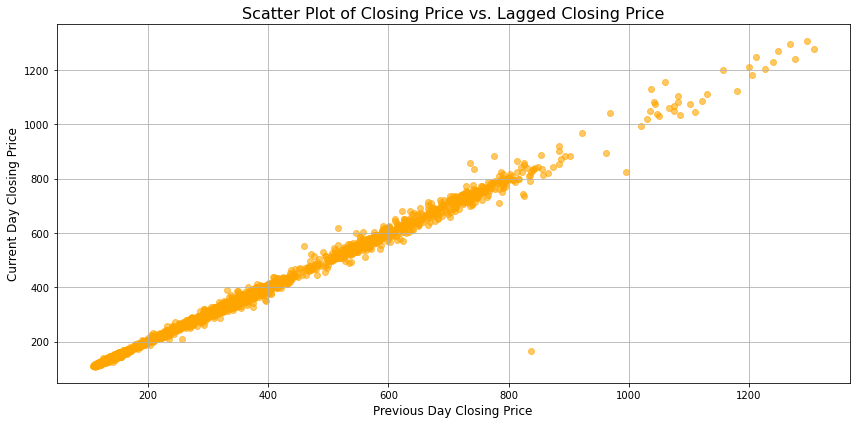

In [21]:
df['Lagged_Close'] = df['Close'].shift(1)
df = df.dropna()
plt.figure(figsize=(12, 6))
plt.scatter(df['Lagged_Close'], df['Close'], color='orange', alpha=0.6)
plt.title('Scatter Plot of Closing Price vs. Lagged Closing Price', fontsize=16)
plt.xlabel('Previous Day Closing Price', fontsize=12)
plt.ylabel('Current Day Closing Price', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


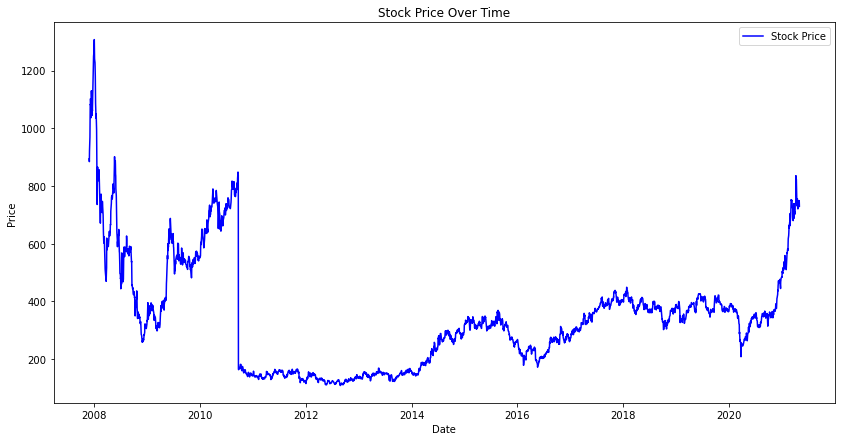

In [22]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'],df['Close'],label='Stock Price', color='b')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

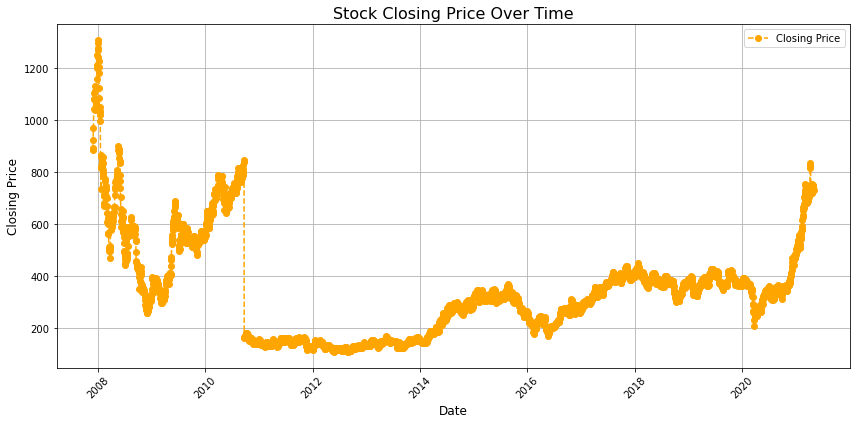

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', linestyle='--', marker='o', color='orange')
plt.title('Stock Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)  
plt.legend()
plt.grid()  
plt.tight_layout()  
plt.show()

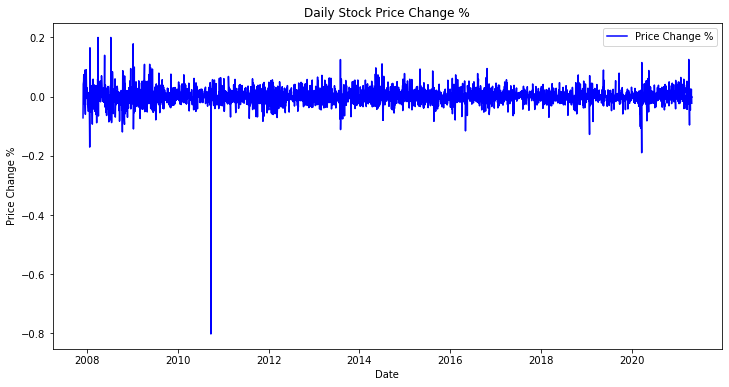

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change %', color='blue')
plt.title('Daily Stock Price Change %')
plt.xlabel('Date')
plt.ylabel('Price Change %')
plt.legend()
plt.show()

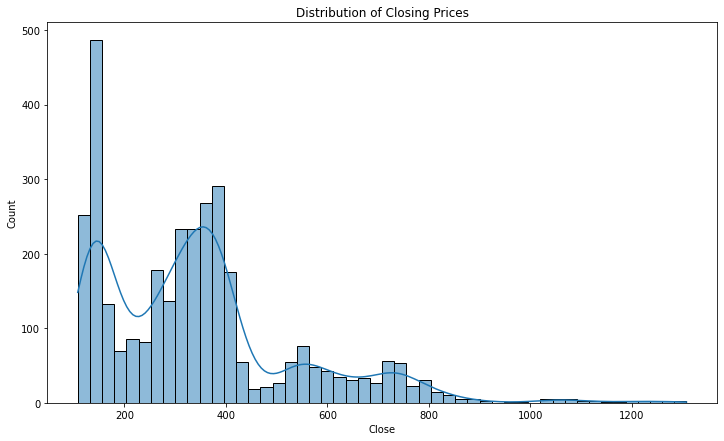

In [25]:

plt.figure(figsize=(12,7))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()


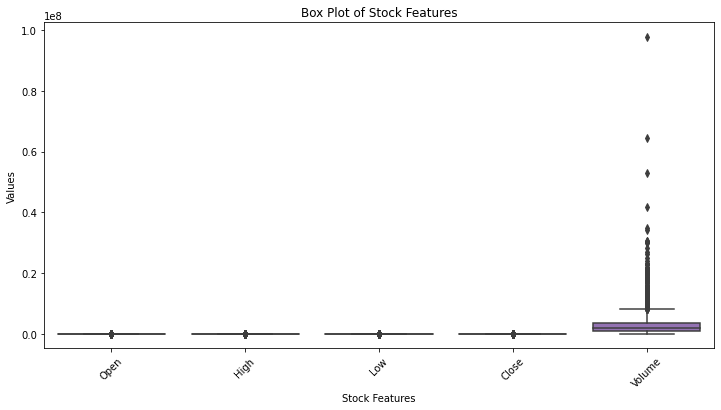

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Box Plot of Stock Features')
plt.xlabel('Stock Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

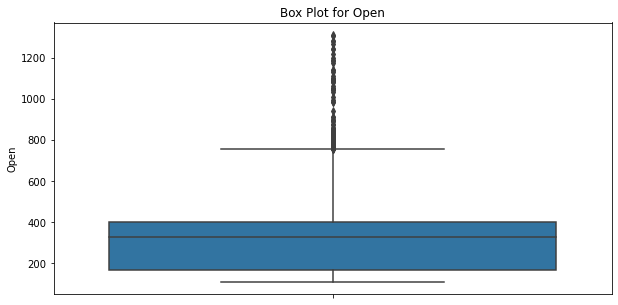

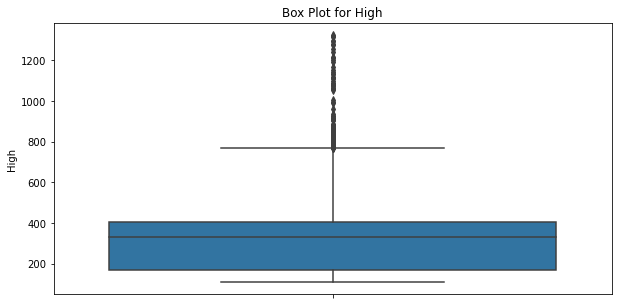

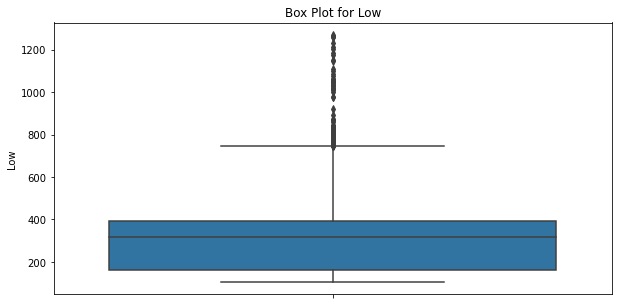

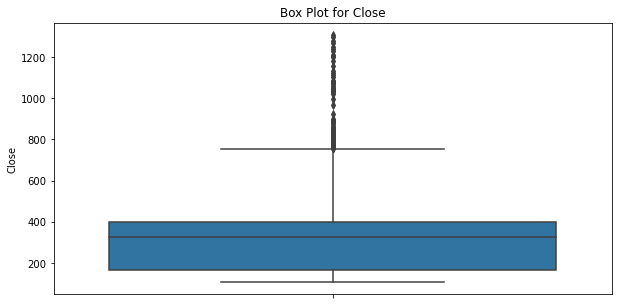

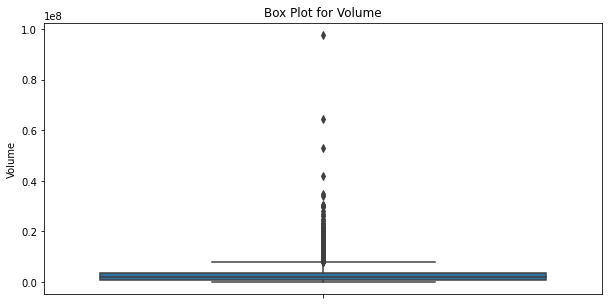

In [27]:
important_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in important_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

## Function to remove outliers using the IQR method

In [28]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
df1 = remove_outliers(df)

In [29]:
print("Original DataFrame:")
print(df)
print("\nCleaned DataFrame (outliers removed):")
print(df1)

Original DataFrame:
           Date      Symbol Series  Prev Close    Open     High     Low  \
1    2007-11-28  MUNDRAPORT     EQ      962.90  984.00   990.00  874.00   
2    2007-11-29  MUNDRAPORT     EQ      893.90  909.00   914.75  841.00   
3    2007-11-30  MUNDRAPORT     EQ      884.20  890.00   958.00  890.00   
4    2007-12-03  MUNDRAPORT     EQ      921.55  939.75   995.00  922.00   
5    2007-12-04  MUNDRAPORT     EQ      969.30  985.00  1056.00  976.00   
...         ...         ...    ...         ...     ...      ...     ...   
3317 2021-04-26  ADANIPORTS     EQ      725.35  733.00   739.65  728.90   
3318 2021-04-27  ADANIPORTS     EQ      730.75  735.00   757.50  727.35   
3319 2021-04-28  ADANIPORTS     EQ      749.15  755.00   760.00  741.10   
3320 2021-04-29  ADANIPORTS     EQ      746.25  753.20   765.85  743.40   
3321 2021-04-30  ADANIPORTS     EQ      746.75  739.00   759.45  724.50   

        Last    Close     VWAP    Volume      Turnover    Trades  \
1      885.

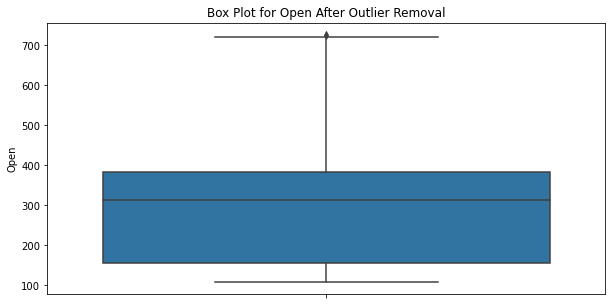

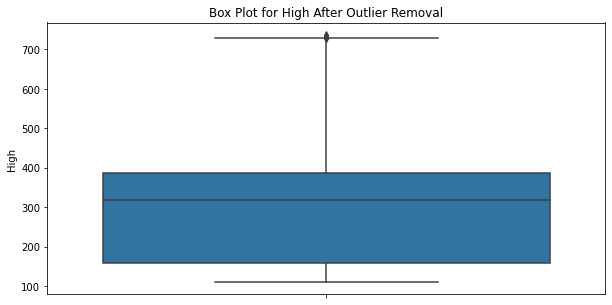

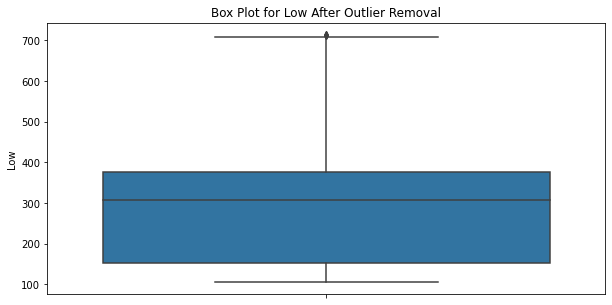

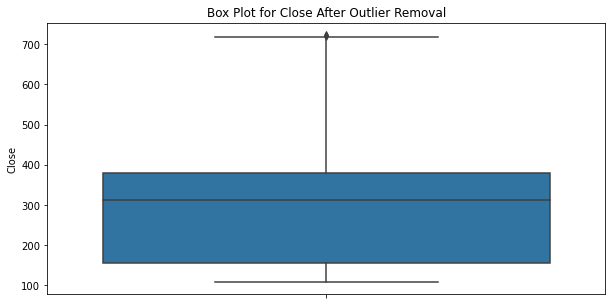

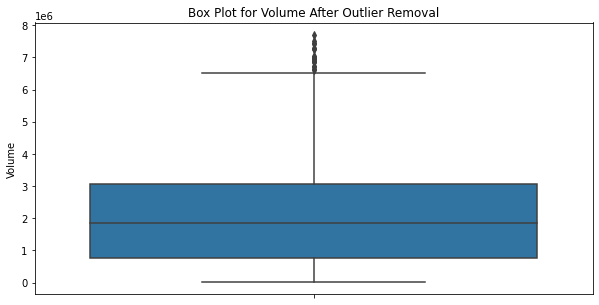

In [30]:
for col in important_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df1[col])
    plt.title(f'Box Plot for {col} After Outlier Removal')
    plt.ylabel(col)
    plt.show()

In [31]:

data_ap = df.loc[ df["Symbol"] == "ADANIPORTS"]

data_ap = data_ap.drop(labels=["Series","Symbol"], axis=1)

<AxesSubplot:>

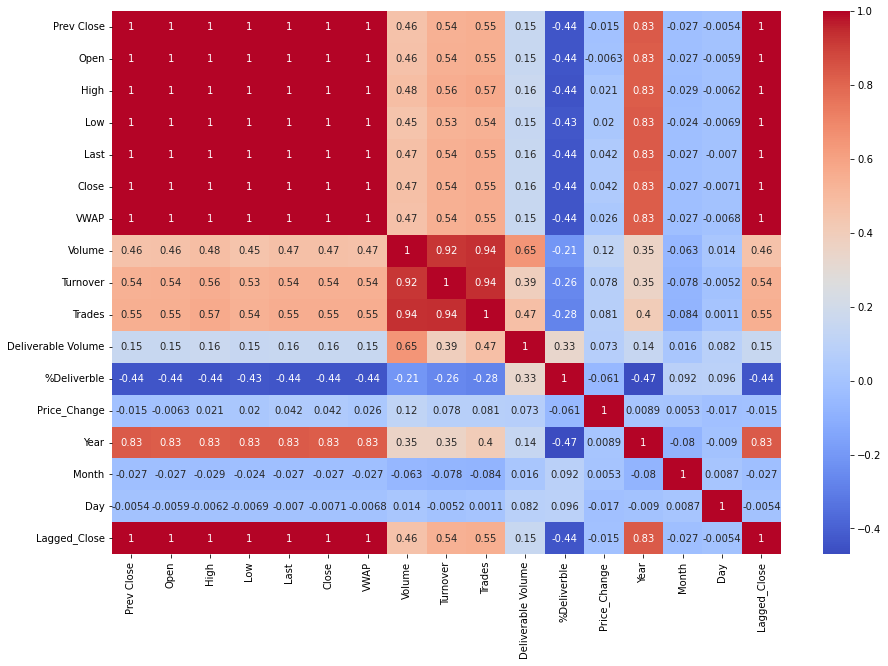

In [32]:

corr = data_ap.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [33]:
high_to_open = corr.loc['High', 'Open']
print(f"Correlation: {high_to_open:.2f}")

Correlation: 1.00


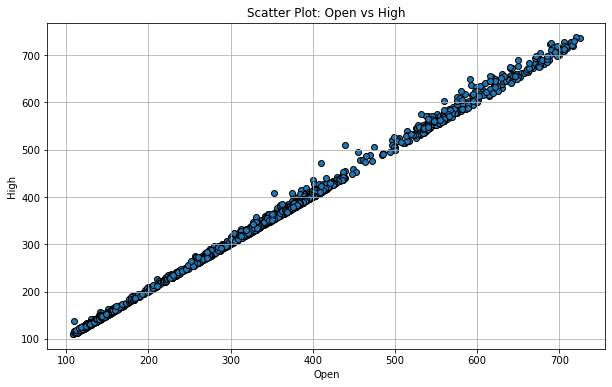

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Open'], df1['High'], edgecolor='black')
plt.title('Scatter Plot: Open vs High')
plt.xlabel('Open')
plt.ylabel('High')
plt.grid(True)
plt.show()

 # Splitting Data for Training and Testing
 

In [35]:
X = df[[ 'High','Low', 'Year', 'Month', 'Day']]  
y = df['Close']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [37]:
scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

In [38]:
from sklearn.linear_model import Ridge , Lasso

ridge_model = Ridge(alpha=100)  
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)  
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression Performance:')
print(f'R² Score: {r2_ridge:.4f}')
print(f'RMSE: {rmse_ridge:.4f}')
print(f'Ridge Regression - RMSE: {rmse_ridge:.4f}, R²: {r2_ridge:.2f}')


Ridge Regression Performance:
R² Score: 0.8276
RMSE: 79.1524
Ridge Regression - RMSE: 79.1524, R²: 0.83


In [39]:
# 2 Lasso Regression

lasso_model = Lasso(alpha=10)  
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)  
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression Performance:')
print(f'R² Score: {r2_lasso:.4f}')
print(f'RMSE: {rmse_lasso:.4f}')
print(f'Lasso Regression - RMSE: {rmse_lasso:.4f}, R²: {r2_lasso:.2f}')


Lasso Regression Performance:
R² Score: 0.8965
RMSE: 61.3110
Lasso Regression - RMSE: 61.3110, R²: 0.90


In [40]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print formatted output
print(f'Random Forest Regression Performance:')
print(f'R² Score: {r2_rf:.4f}')
print(f'RMSE: {rmse_rf:.4f}')
print(f'Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.2f}')


Random Forest Regression Performance:
R² Score: 0.9154
RMSE: 55.4285
Random Forest - RMSE: 55.4285, R²: 0.92


In [41]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=2, min_samples_split=50, random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regression Performance:')
print(f'R² Score: {r2_dt:.4f}')
print(f'RMSE: {rmse_dt:.4f}')
print(f'Decision Tree - RMSE: {rmse_dt:.4f}, R²: {r2_dt:.2f}')


Decision Tree Regression Performance:
R² Score: 0.9015
RMSE: 59.8131
Decision Tree - RMSE: 59.8131, R²: 0.90


In [42]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

threshold = 0.5 
accuracy = np.mean(np.abs((y_test - y_pred_svr) / y_test) < threshold) * 100

print(f'Support Vector Regression Performance:')
print(f'SVR - Accuracy: {accuracy:.2f}%')


Support Vector Regression Performance:
SVR - Accuracy: 95.49%


In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=5)  
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)


mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

threshold = 0.1  
accuracy = np.mean(np.abs((y_test - y_pred_knn) / y_test) < threshold) * 100

print(f'KNN Regression Performance:')
print(f'RMSE: {rmse_knn:.4f}')
print(f'R² Score: {r2_knn:.4f}')
print(f'KNN - : {accuracy:.2f}%')


KNN Regression Performance:
RMSE: 16.4848
R² Score: 0.9925
KNN - : 93.83%


# Predicting future stock price

In [44]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Prices', color='b')
    plt.plot(y_pred, label=f'Predicted Prices - {model_name}', color='r', linestyle='--')
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Prices')
    plt.legend()
    plt.show()

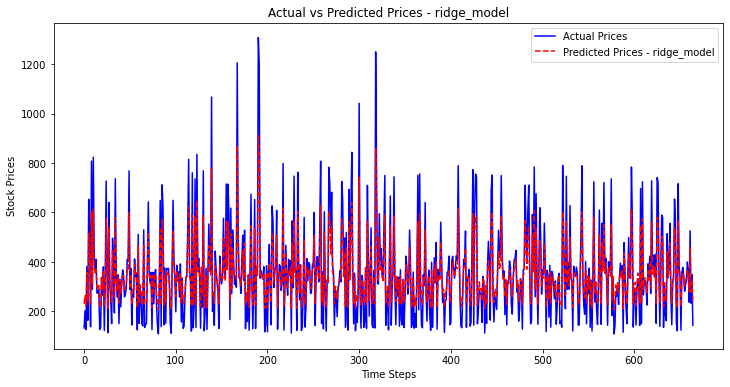

In [45]:
plot_actual_vs_predicted(y_test, y_pred_ridge, 'ridge_model')

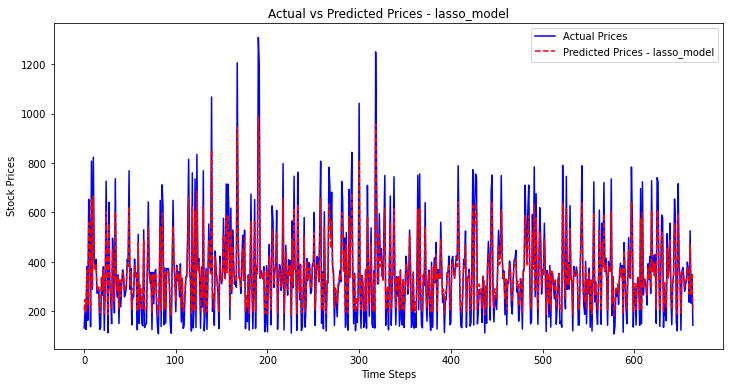

In [46]:
plot_actual_vs_predicted(y_test, y_pred_lasso, 'lasso_model')

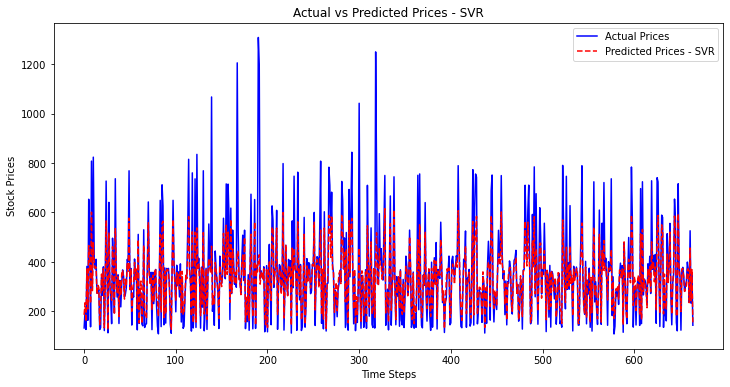

In [47]:
plot_actual_vs_predicted(y_test, y_pred_svr, 'SVR')

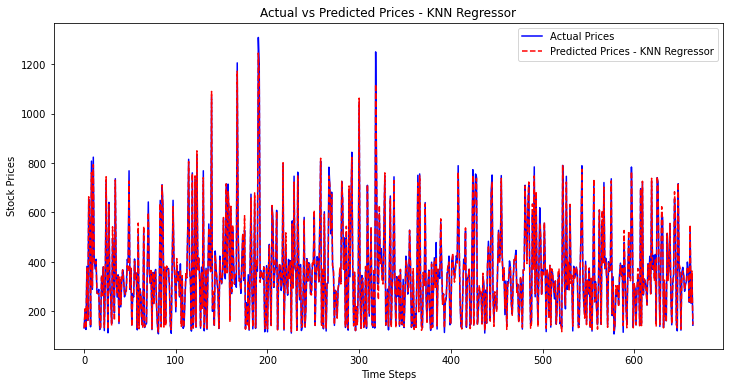

In [48]:
plot_actual_vs_predicted(y_test, y_pred_knn, 'KNN Regressor')

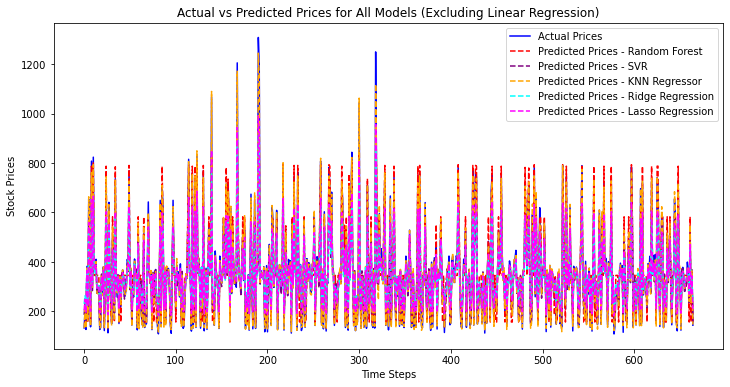

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='b')
plt.plot(y_pred_rf, label='Predicted Prices - Random Forest', color='r', linestyle='--')
plt.plot(y_pred_svr, label='Predicted Prices - SVR', color='purple', linestyle='--')
plt.plot(y_pred_knn, label='Predicted Prices - KNN Regressor', color='orange', linestyle='--')
plt.plot(y_pred_ridge, label='Predicted Prices - Ridge Regression', color='cyan', linestyle='--')  
plt.plot(y_pred_lasso, label='Predicted Prices - Lasso Regression', color='magenta', linestyle='--')  
plt.title('Actual vs Predicted Prices for All Models (Excluding Linear Regression)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()


In [50]:

highest_high = df['High'].max()
lowest_low = df['Low'].min()

In [51]:
future_data = pd.DataFrame([[ highest_high,lowest_low, 2021, 5, 15]], columns=['High','Low',  'Year', 'Month', 'Day'])


In [52]:
future_data_scaled = scaler.transform(future_data)


In [53]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
future_pred = linear_model.predict(future_data_scaled)
print(f'Predicted Stock Price for 2021-05-15: {future_pred[0]}')

Predicted Stock Price for 2021-05-15: 700.2567581271776


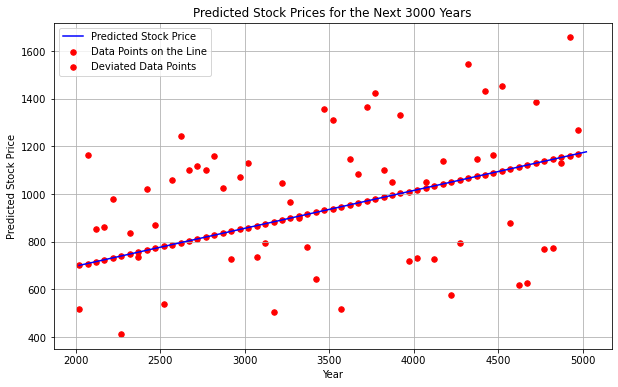

In [54]:
future_years = np.arange(2021, 2021 + 3000)  # from 2021 to 5021
future_month = 5
future_day = 15


future_data = pd.DataFrame({
    'High': [highest_high] * len(future_years), 
    'Low': [lowest_low] * len(future_years), 
    'Year': future_years,
    'Month': [future_month] * len(future_years),
    'Day': [future_day] * len(future_years)
})

# Scale the future data
future_data_scaled = scaler.transform(future_data)

# Predict future stock prices
future_pred = linear_model.predict(future_data_scaled)


outlier_years = future_years[::50]  # Only every 50th year
outlier_values = future_pred[::50] + np.random.uniform(-500, 500, size=len(outlier_years))  # Add random deviation


plt.figure(figsize=(10, 6))

plt.plot(future_years, future_pred, label='Predicted Stock Price', color='blue')


plt.scatter(future_years[::50], future_pred[::50], color='red', s=30, label='Data Points on the Line')
plt.scatter(outlier_years, outlier_values, color='red', s=30, label='Deviated Data Points')  # Same color for deviations
# Add labels, grid, legend, and title
plt.title('Predicted Stock Prices for the Next 3000 Years')
plt.xlabel('Year')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()




In [55]:

for year, pred in zip(future_years, future_pred):
    print(f'Year: {year}, Predicted Stock Price ADANI PORTS: {pred:.2f}')



Year: 2021, Predicted Stock Price ADANI PORTS: 700.26
Year: 2022, Predicted Stock Price ADANI PORTS: 700.42
Year: 2023, Predicted Stock Price ADANI PORTS: 700.57
Year: 2024, Predicted Stock Price ADANI PORTS: 700.73
Year: 2025, Predicted Stock Price ADANI PORTS: 700.89
Year: 2026, Predicted Stock Price ADANI PORTS: 701.05
Year: 2027, Predicted Stock Price ADANI PORTS: 701.21
Year: 2028, Predicted Stock Price ADANI PORTS: 701.37
Year: 2029, Predicted Stock Price ADANI PORTS: 701.53
Year: 2030, Predicted Stock Price ADANI PORTS: 701.69
Year: 2031, Predicted Stock Price ADANI PORTS: 701.85
Year: 2032, Predicted Stock Price ADANI PORTS: 702.01
Year: 2033, Predicted Stock Price ADANI PORTS: 702.16
Year: 2034, Predicted Stock Price ADANI PORTS: 702.32
Year: 2035, Predicted Stock Price ADANI PORTS: 702.48
Year: 2036, Predicted Stock Price ADANI PORTS: 702.64
Year: 2037, Predicted Stock Price ADANI PORTS: 702.80
Year: 2038, Predicted Stock Price ADANI PORTS: 702.96
Year: 2039, Predicted Stock 

# DATASET 2

In [56]:
df = pd.read_csv('BPCL.csv')
df.head() 

Date Symbol Series  Prev Close    Open    High     Low    Last  \
0  2000-01-03   BPCL     EQ      381.20  405.00  407.00  393.05  397.75   
1  2000-01-04   BPCL     EQ      399.25  397.75  397.75  367.40  377.45   
2  2000-01-05   BPCL     EQ      370.50  350.00  385.00  350.00  360.10   
3  2000-01-06   BPCL     EQ      359.95  362.00  384.00  362.00  381.65   
4  2000-01-07   BPCL     EQ      380.30  369.00  390.00  366.00  381.50   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  399.25  399.32    8720  3.482029e+11     NaN                 NaN   
1  370.50  375.71   22820  8.573699e+11     NaN                 NaN   
2  359.95  359.96  152538  5.490785e+12     NaN                 NaN   
3  380.30  380.10   59554  2.263623e+12     NaN                 NaN   
4  379.85  378.33   43187  1.633890e+12     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

# Data Preprocessing

In [57]:
df.shape

(5306, 15)

In [58]:
df.tail()

Date Symbol Series  Prev Close   Open    High     Low    Last  \
5301  2021-04-26   BPCL     EQ      423.05  426.0  428.35  417.55  417.60   
5302  2021-04-27   BPCL     EQ      418.90  417.5  423.10  416.55  420.00   
5303  2021-04-28   BPCL     EQ      420.35  422.0  424.35  414.90  417.15   
5304  2021-04-29   BPCL     EQ      417.50  422.0  423.00  417.00  419.00   
5305  2021-04-30   BPCL     EQ      419.55  417.5  437.50  414.65  422.10   

       Close    VWAP    Volume      Turnover    Trades  Deliverable Volume  \
5301  418.90  421.33   6444098  2.715060e+14   68579.0           2408600.0   
5302  420.35  420.45   5408165  2.273853e+14   45282.0           2300523.0   
5303  417.50  419.33   9902533  4.152459e+14   59529.0           5176820.0   
5304  419.55  420.00   6632804  2.785775e+14   64676.0           2976829.0   
5305  421.80  428.14  16851470  7.214724e+14  195429.0           6453804.0   

      %Deliverble  
5301       0.3738  
5302       0.4254  
5303       0.5228  
5304       0.4488  
5305       0.3830

In [59]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [61]:
df.describe()

Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean    444.369977   445.014220   452.935686   436.630013   444.384065   
std     184.340340   184.491153   186.373754   182.706581   184.352843   
min     110.150000   113.900000   117.500000   106.250000   110.000000   
25%     333.837500   334.000000   341.000000   326.387500   334.012500   
50%     393.400000   394.075000   400.825000   385.350000   393.100000   
75%     555.125000   555.750000   564.975000   544.987500   554.937500   
max    1133.300000  1132.200000  1156.000000  1120.100000  1132.100000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean    444.377629   444.802256  2.093650e+06  9.323829e+13   55725.562704   
std     184.338560   184.537444  4.462703e+06  1.927900e+14   47656.113461   
min     110.150000   114.130000  2.297000e+03  6.755889e+10     427.000000   
25%     333.837500   333.715000  4.136565e+05  1.647654e+13   24509.750000   
50%     393.550000   392.680000  8.820490e+05  3.808395e+13   45158.500000   
75%     555.125000   554.590000  2.040695e+06  1.140152e+14   71881.750000   
max    1133.300000  1137.040000  1.997910e+08  8.810053e+15  511790.000000   

       Deliverable Volume  %Deliverble  
count        4.797000e+03  4797.000000  
mean         8.673432e+05     0.443450  
std          2.283629e+06     0.150737  
min          2.903000e+03     0.050500  
25%          2.305310e+05     0.333200  
50%          4.431750e+05     0.443800  
75%          9.883100e+05     0.547000  
max          1.355721e+08     1.000000

In [62]:
print(df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [63]:
df["Symbol"].unique()

array(['BPCL'], dtype=object)

In [64]:
df.duplicated().sum()

0

In [65]:
unique_dates = df['Date'].unique()
print(f"Number of unique dates: {len(unique_dates)}")
print("Unique dates:", unique_dates)

Number of unique dates: 5306
Unique dates: ['2000-01-03' '2000-01-04' '2000-01-05' ... '2021-04-28' '2021-04-29'
 '2021-04-30']


In [66]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [67]:

df['%Deliverble'] = df['%Deliverble'].fillna(df['%Deliverble'].mean())

In [68]:
df['Trades'].fillna(0, inplace=True)


In [69]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                  0
Deliverable Volume    509
%Deliverble             0
dtype: int64

In [70]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

In [71]:
df['Price_Change'] = df['Close'].pct_change()  
df.head()

Date Symbol Series  Prev Close    Open    High     Low    Last  \
0 2000-01-03   BPCL     EQ      381.20  405.00  407.00  393.05  397.75   
1 2000-01-04   BPCL     EQ      399.25  397.75  397.75  367.40  377.45   
2 2000-01-05   BPCL     EQ      370.50  350.00  385.00  350.00  360.10   
3 2000-01-06   BPCL     EQ      359.95  362.00  384.00  362.00  381.65   
4 2000-01-07   BPCL     EQ      380.30  369.00  390.00  366.00  381.50   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  399.25  399.32    8720  3.482029e+11     0.0                 NaN   
1  370.50  375.71   22820  8.573699e+11     0.0                 NaN   
2  359.95  359.96  152538  5.490785e+12     0.0                 NaN   
3  380.30  380.10   59554  2.263623e+12     0.0                 NaN   
4  379.85  378.33   43187  1.633890e+12     0.0                 NaN   

   %Deliverble  Price_Change  
0      0.44345           NaN  
1      0.44345     -0.072010  
2      0.44345     -0.028475  
3      0.44345      0.056536  
4      0.44345     -0.001183

In [72]:
df['Price_Change'].fillna(np.mean(df['Price_Change']), inplace = True)
df.head()

Date Symbol Series  Prev Close    Open    High     Low    Last  \
0 2000-01-03   BPCL     EQ      381.20  405.00  407.00  393.05  397.75   
1 2000-01-04   BPCL     EQ      399.25  397.75  397.75  367.40  377.45   
2 2000-01-05   BPCL     EQ      370.50  350.00  385.00  350.00  360.10   
3 2000-01-06   BPCL     EQ      359.95  362.00  384.00  362.00  381.65   
4 2000-01-07   BPCL     EQ      380.30  369.00  390.00  366.00  381.50   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  399.25  399.32    8720  3.482029e+11     0.0                 NaN   
1  370.50  375.71   22820  8.573699e+11     0.0                 NaN   
2  359.95  359.96  152538  5.490785e+12     0.0                 NaN   
3  380.30  380.10   59554  2.263623e+12     0.0                 NaN   
4  379.85  378.33   43187  1.633890e+12     0.0                 NaN   

   %Deliverble  Price_Change  
0      0.44345      0.000488  
1      0.44345     -0.072010  
2      0.44345     -0.028475  
3      0.44345      0.056536  
4      0.44345     -0.001183

In [73]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [74]:
df.head()

Date Symbol Series  Prev Close    Open    High     Low    Last  \
0 2000-01-03   BPCL     EQ      381.20  405.00  407.00  393.05  397.75   
1 2000-01-04   BPCL     EQ      399.25  397.75  397.75  367.40  377.45   
2 2000-01-05   BPCL     EQ      370.50  350.00  385.00  350.00  360.10   
3 2000-01-06   BPCL     EQ      359.95  362.00  384.00  362.00  381.65   
4 2000-01-07   BPCL     EQ      380.30  369.00  390.00  366.00  381.50   

    Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  399.25  399.32    8720  3.482029e+11     0.0                 NaN   
1  370.50  375.71   22820  8.573699e+11     0.0                 NaN   
2  359.95  359.96  152538  5.490785e+12     0.0                 NaN   
3  380.30  380.10   59554  2.263623e+12     0.0                 NaN   
4  379.85  378.33   43187  1.633890e+12     0.0                 NaN   

   %Deliverble  Price_Change  Year  Month  Day  
0      0.44345      0.000488  2000      1    3  
1      0.44345     -0.072010  2000      1    4  
2      0.44345     -0.028475  2000      1    5  
3      0.44345      0.056536  2000      1    6  
4      0.44345     -0.001183  2000      1    7

In [75]:

df[['Date', 'Close', 'Price_Change', 'Volume', 'Turnover']].head()

Date   Close  Price_Change  Volume      Turnover
0 2000-01-03  399.25      0.000488    8720  3.482029e+11
1 2000-01-04  370.50     -0.072010   22820  8.573699e+11
2 2000-01-05  359.95     -0.028475  152538  5.490785e+12
3 2000-01-06  380.30      0.056536   59554  2.263623e+12
4 2000-01-07  379.85     -0.001183   43187  1.633890e+12

#  Data Visualization

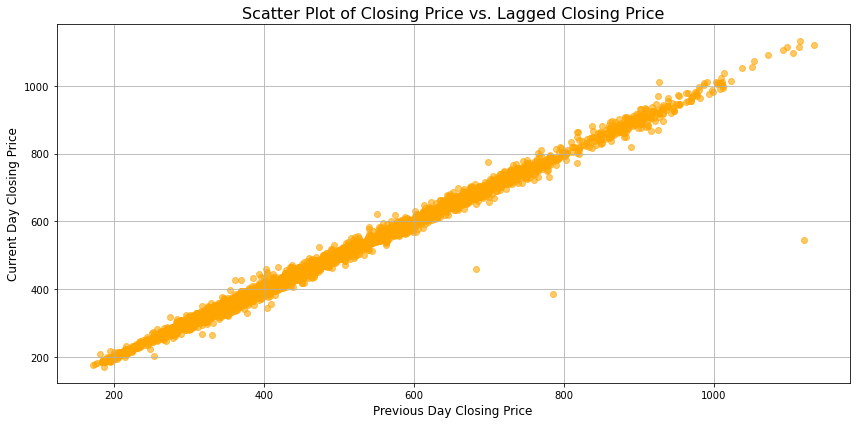

In [76]:
df['Lagged_Close'] = df['Close'].shift(1)
df = df.dropna()
plt.figure(figsize=(12, 6))
plt.scatter(df['Lagged_Close'], df['Close'], color='orange', alpha=0.6)
plt.title('Scatter Plot of Closing Price vs. Lagged Closing Price', fontsize=16)
plt.xlabel('Previous Day Closing Price', fontsize=12)
plt.ylabel('Current Day Closing Price', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


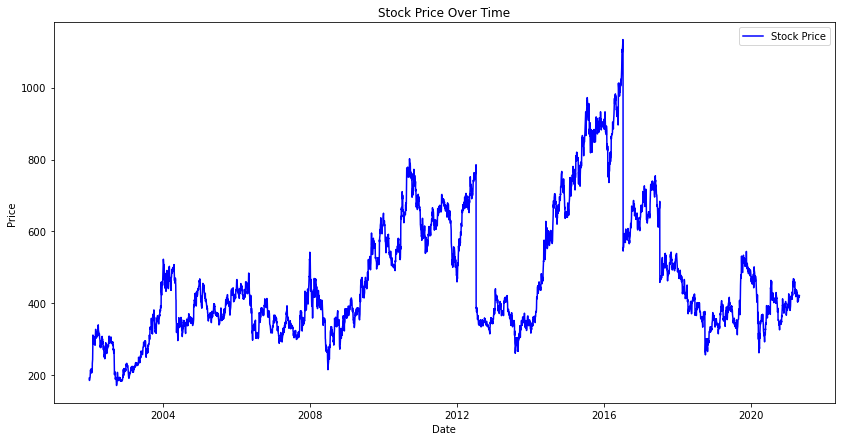

In [77]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'],df['Close'],label='Stock Price', color='b')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

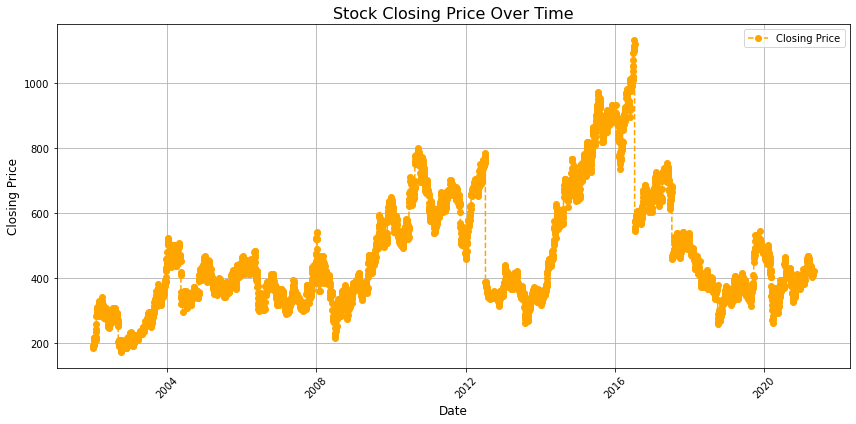

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', linestyle='--', marker='o', color='orange')
plt.title('Stock Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)  
plt.legend()
plt.grid()  
plt.tight_layout()  
plt.show()

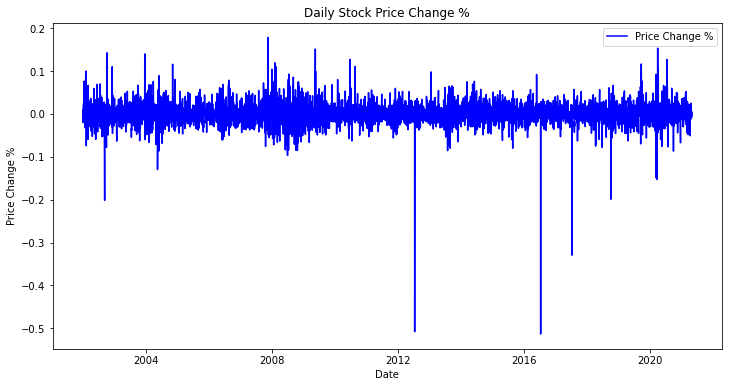

In [79]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change %', color='blue')
plt.title('Daily Stock Price Change %')
plt.xlabel('Date')
plt.ylabel('Price Change %')
plt.legend()
plt.show()

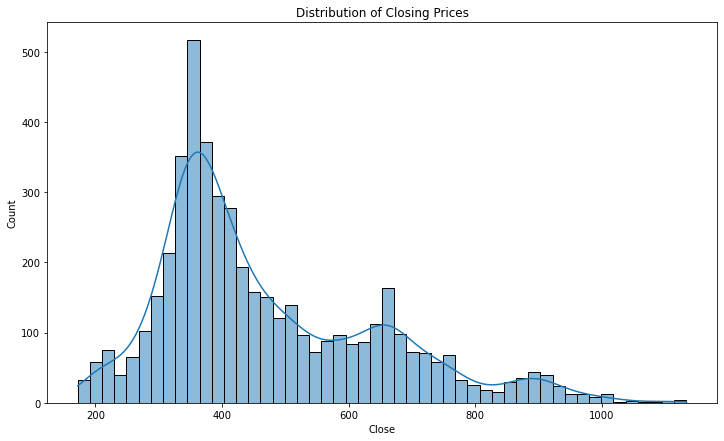

In [80]:

plt.figure(figsize=(12,7))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()


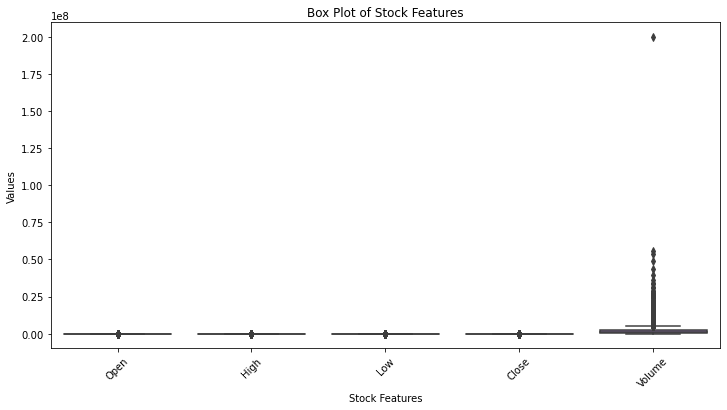

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Box Plot of Stock Features')
plt.xlabel('Stock Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

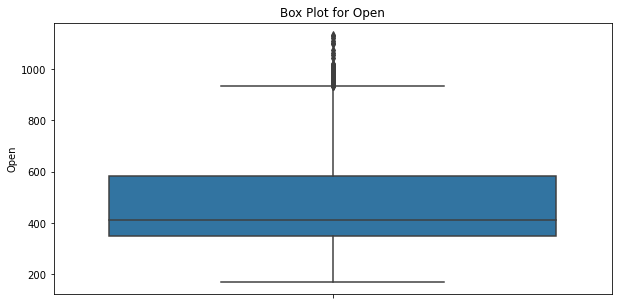

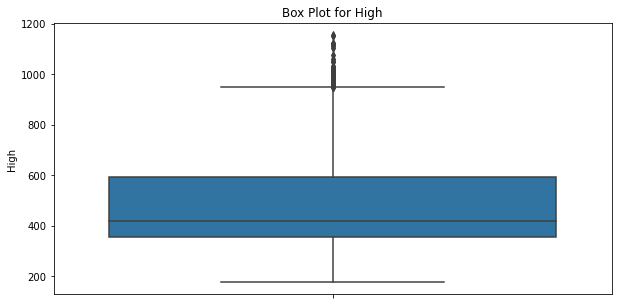

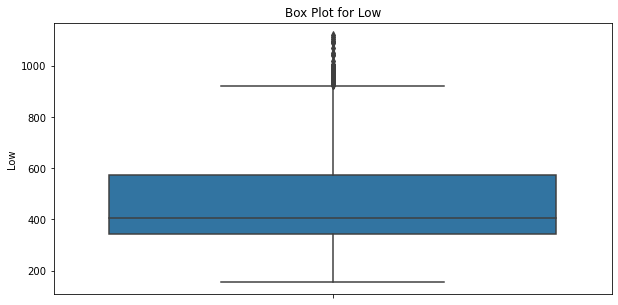

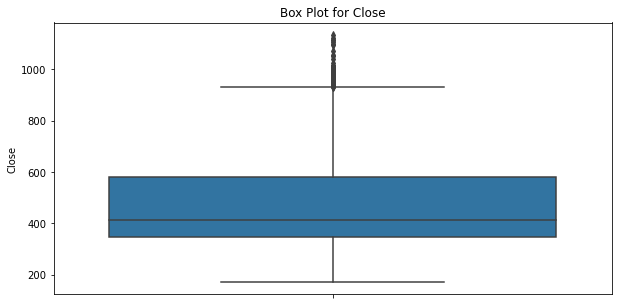

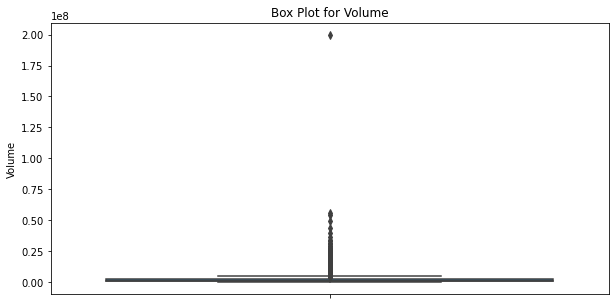

In [82]:
important_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in important_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

## Function to remove outliers using the IQR method

In [83]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
df1 = remove_outliers(df)

In [84]:
print("Original DataFrame:")
print(df)
print("\nCleaned DataFrame (outliers removed):")
print(df1)

Original DataFrame:
           Date Symbol Series  Prev Close    Open    High     Low    Last  \
498  2002-01-01   BPCL     EQ      190.60  191.50  194.50  189.10  192.10   
499  2002-01-02   BPCL     EQ      192.20  199.00  199.00  187.85  188.75   
500  2002-01-03   BPCL     EQ      188.35  193.85  194.60  181.00  187.00   
501  2002-01-04   BPCL     EQ      186.00  190.00  191.00  184.00  187.00   
502  2002-01-07   BPCL     EQ      186.20  188.50  192.80  188.50  190.00   
...         ...    ...    ...         ...     ...     ...     ...     ...   
5301 2021-04-26   BPCL     EQ      423.05  426.00  428.35  417.55  417.60   
5302 2021-04-27   BPCL     EQ      418.90  417.50  423.10  416.55  420.00   
5303 2021-04-28   BPCL     EQ      420.35  422.00  424.35  414.90  417.15   
5304 2021-04-29   BPCL     EQ      417.50  422.00  423.00  417.00  419.00   
5305 2021-04-30   BPCL     EQ      419.55  417.50  437.50  414.65  422.10   

       Close    VWAP    Volume      Turnover    Trades 

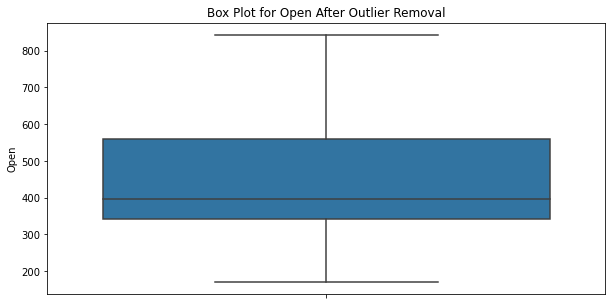

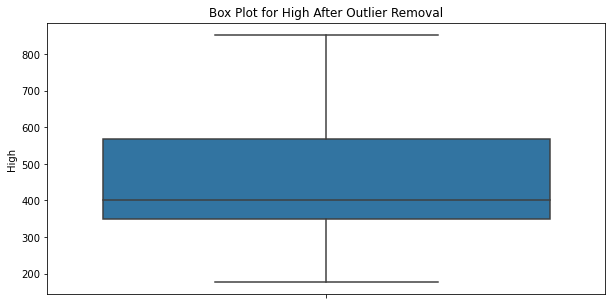

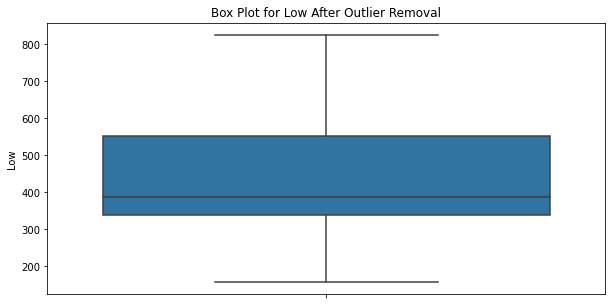

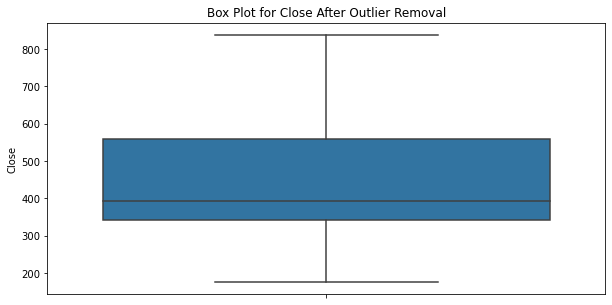

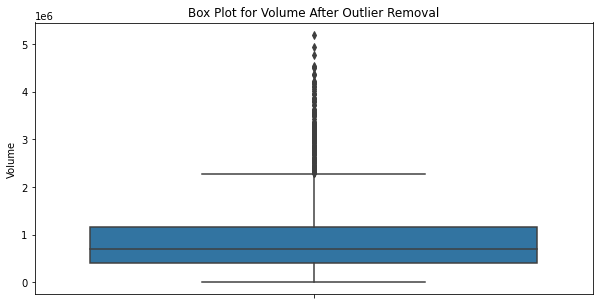

In [85]:
for col in important_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df1[col])
    plt.title(f'Box Plot for {col} After Outlier Removal')
    plt.ylabel(col)
    plt.show()

In [86]:

data_ap = df.loc[ df["Symbol"] == "BPCL"]

data_ap = data_ap.drop(labels=["Series","Symbol"], axis=1)

<AxesSubplot:>

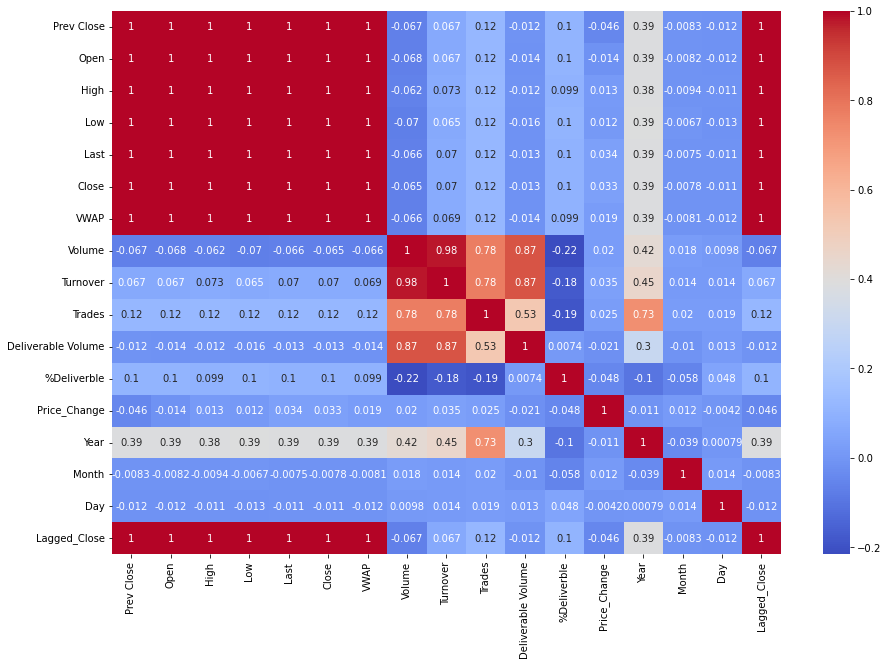

In [87]:
corr = data_ap.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [88]:
high_to_open = corr.loc['High', 'Open']
print(f"Correlation: {high_to_open:.2f}")

Correlation: 1.00


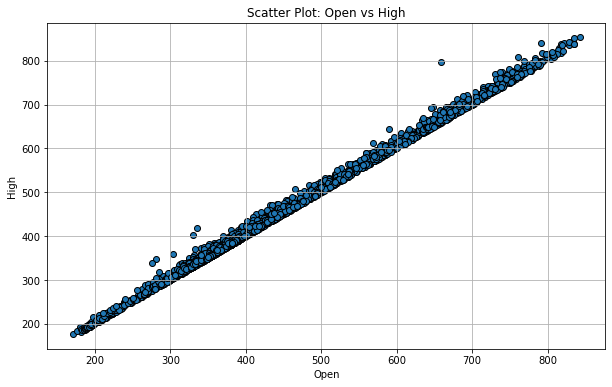

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Open'], df1['High'], edgecolor='black')
plt.title('Scatter Plot: Open vs High')
plt.xlabel('Open')
plt.ylabel('High')
plt.grid(True)
plt.show()

 # Splitting Data for Training and Testing
 

In [90]:
X = df[[ 'High','Low', 'Year', 'Month', 'Day']]  
y = df['Close']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [92]:
scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

In [93]:
from sklearn.linear_model import Ridge , Lasso

ridge_model = Ridge(alpha=100)  
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)  
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression Performance:')
print(f'R² Score: {r2_ridge:.4f}')
print(f'RMSE: {rmse_ridge:.4f}')
print(f'Ridge Regression - RMSE: {rmse_ridge:.4f}, R²: {r2_ridge:.2f}')


Ridge Regression Performance:
R² Score: 0.9140
RMSE: 50.6444
Ridge Regression - RMSE: 50.6444, R²: 0.91


In [94]:
# 2 Lasso Regression

lasso_model = Lasso(alpha=100)  
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)  
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression Performance:')
print(f'R² Score: {r2_lasso:.4f}')
print(f'RMSE: {rmse_lasso:.4f}')
print(f'Lasso Regression - RMSE: {rmse_lasso:.4f}, R²: {r2_lasso:.2f}')


Lasso Regression Performance:
R² Score: -0.0018
RMSE: 172.8581
Lasso Regression - RMSE: 172.8581, R²: -0.00


In [95]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print formatted output
print(f'Random Forest Regression Performance:')
print(f'R² Score: {r2_rf:.4f}')
print(f'RMSE: {rmse_rf:.4f}')
print(f'Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.2f}')


Random Forest Regression Performance:
R² Score: 0.9192
RMSE: 49.1028
Random Forest - RMSE: 49.1028, R²: 0.92


In [96]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=2, min_samples_split=50, random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regression Performance:')
print(f'R² Score: {r2_dt:.4f}')
print(f'RMSE: {rmse_dt:.4f}')
print(f'Decision Tree - RMSE: {rmse_dt:.4f}, R²: {r2_dt:.2f}')


Decision Tree Regression Performance:
R² Score: 0.9082
RMSE: 52.3187
Decision Tree - RMSE: 52.3187, R²: 0.91


In [97]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

threshold = 0.5 
accuracy = np.mean(np.abs((y_test - y_pred_svr) / y_test) < threshold) * 100

print(f'Support Vector Regression Performance:')
print(f'SVR - Accuracy: {accuracy:.2f}%')


Support Vector Regression Performance:
SVR - Accuracy: 97.40%


In [98]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=5)  
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)


mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

threshold = 0.1  
accuracy = np.mean(np.abs((y_test - y_pred_knn) / y_test) < threshold) * 100

print(f'KNN Regression Performance:')
print(f'RMSE: {rmse_knn:.4f}')
print(f'R² Score: {r2_knn:.4f}')
print(f'KNN - : {accuracy:.2f}%')


KNN Regression Performance:
RMSE: 14.2403
R² Score: 0.9932
KNN - : 98.65%


# Predicting future stock price

In [99]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Prices', color='b')
    plt.plot(y_pred, label=f'Predicted Prices - {model_name}', color='r', linestyle='--')
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Prices')
    plt.legend()
    plt.show()

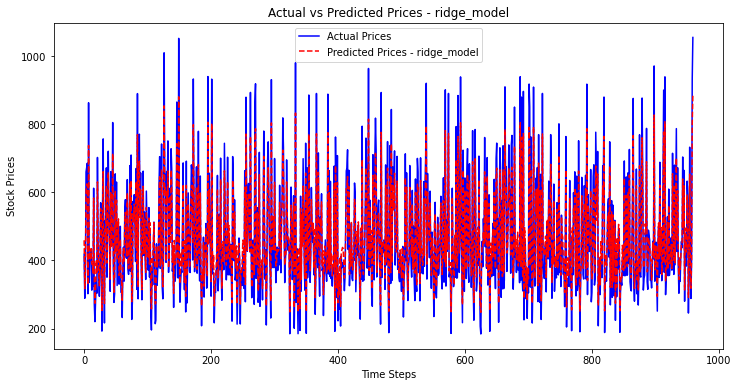

In [100]:
plot_actual_vs_predicted(y_test, y_pred_ridge, 'ridge_model')

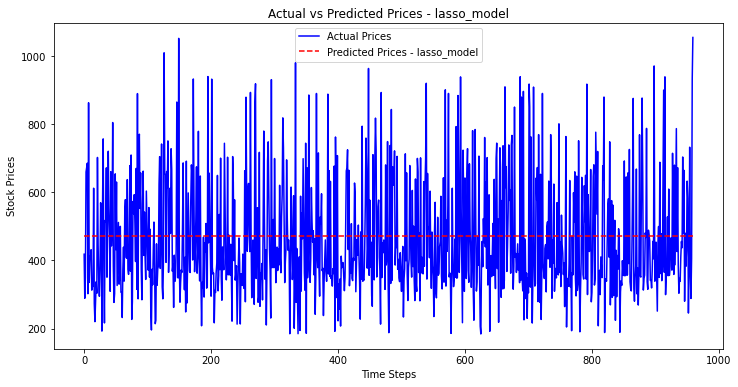

In [101]:
plot_actual_vs_predicted(y_test, y_pred_lasso, 'lasso_model')

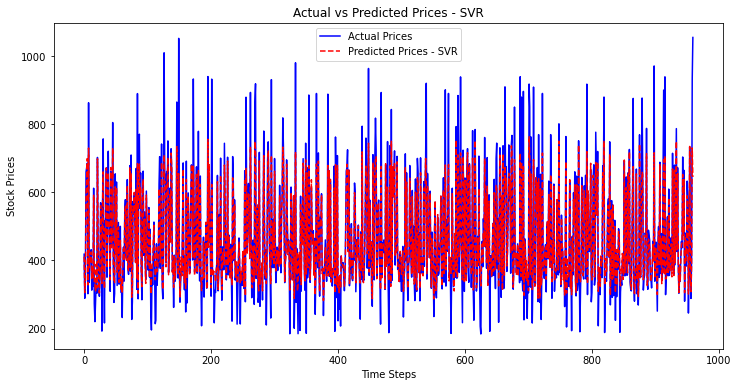

In [102]:
plot_actual_vs_predicted(y_test, y_pred_svr, 'SVR')

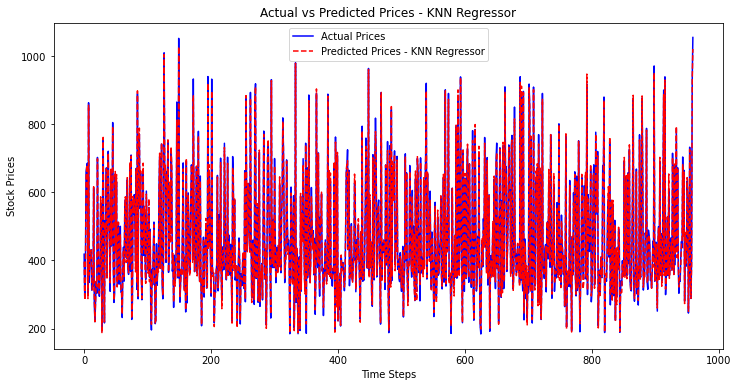

In [103]:
plot_actual_vs_predicted(y_test, y_pred_knn, 'KNN Regressor')

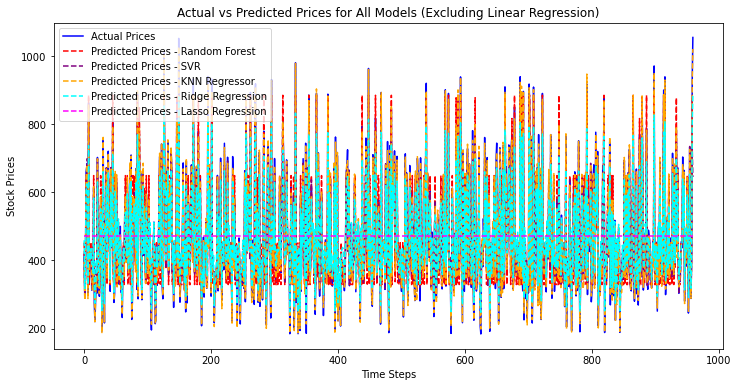

In [104]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='b')
plt.plot(y_pred_rf, label='Predicted Prices - Random Forest', color='r', linestyle='--')
plt.plot(y_pred_svr, label='Predicted Prices - SVR', color='purple', linestyle='--')
plt.plot(y_pred_knn, label='Predicted Prices - KNN Regressor', color='orange', linestyle='--')
plt.plot(y_pred_ridge, label='Predicted Prices - Ridge Regression', color='cyan', linestyle='--')  
plt.plot(y_pred_lasso, label='Predicted Prices - Lasso Regression', color='magenta', linestyle='--')  
plt.title('Actual vs Predicted Prices for All Models (Excluding Linear Regression)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()


In [105]:

highest_high = df['High'].max()
lowest_low = df['Low'].min()

In [106]:
future_data = pd.DataFrame([[ highest_high,lowest_low, 2021, 5, 15]], columns=['High','Low',  'Year', 'Month', 'Day'])


In [107]:
future_data_scaled = scaler.transform(future_data)


In [108]:
future_pred = linear_model.predict(future_data_scaled)
print(f'Predicted Stock Price for 2021-05-15: {future_pred[0]}')

Predicted Stock Price for 2021-05-15: 697.8230124897352


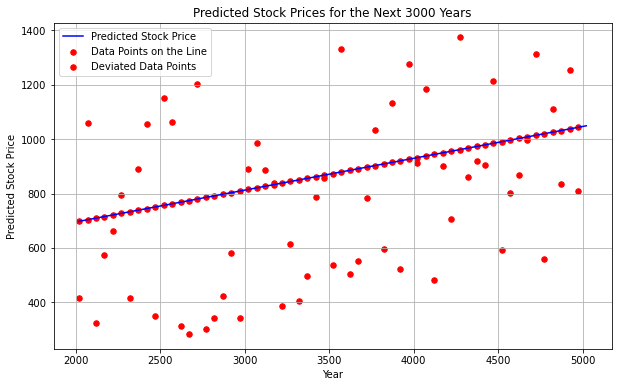

In [109]:
future_years = np.arange(2021, 2021 + 3000)  # from 2021 to 5021
future_month = 5
future_day = 15


future_data = pd.DataFrame({
    'High': [highest_high] * len(future_years), 
    'Low': [lowest_low] * len(future_years), 
    'Year': future_years,
    'Month': [future_month] * len(future_years),
    'Day': [future_day] * len(future_years)
})

# Scale the future data
future_data_scaled = scaler.transform(future_data)

# Predict future stock prices
future_pred = linear_model.predict(future_data_scaled)


outlier_years = future_years[::50]  # Only every 50th year
outlier_values = future_pred[::50] + np.random.uniform(-500, 500, size=len(outlier_years))  # Add random deviation


plt.figure(figsize=(10, 6))

plt.plot(future_years, future_pred, label='Predicted Stock Price', color='blue')


plt.scatter(future_years[::50], future_pred[::50], color='red', s=30, label='Data Points on the Line')
plt.scatter(outlier_years, outlier_values, color='red', s=30, label='Deviated Data Points')  # Same color for deviations
# Add labels, grid, legend, and title
plt.title('Predicted Stock Prices for the Next 3000 Years')
plt.xlabel('Year')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()




In [110]:

for year, pred in zip(future_years, future_pred):
    print(f'Year: {year}, Predicted Stock Price BCPL: {pred:.2f}')



Year: 2021, Predicted Stock Price BCPL: 697.82
Year: 2022, Predicted Stock Price BCPL: 697.94
Year: 2023, Predicted Stock Price BCPL: 698.06
Year: 2024, Predicted Stock Price BCPL: 698.17
Year: 2025, Predicted Stock Price BCPL: 698.29
Year: 2026, Predicted Stock Price BCPL: 698.41
Year: 2027, Predicted Stock Price BCPL: 698.53
Year: 2028, Predicted Stock Price BCPL: 698.64
Year: 2029, Predicted Stock Price BCPL: 698.76
Year: 2030, Predicted Stock Price BCPL: 698.88
Year: 2031, Predicted Stock Price BCPL: 698.99
Year: 2032, Predicted Stock Price BCPL: 699.11
Year: 2033, Predicted Stock Price BCPL: 699.23
Year: 2034, Predicted Stock Price BCPL: 699.35
Year: 2035, Predicted Stock Price BCPL: 699.46
Year: 2036, Predicted Stock Price BCPL: 699.58
Year: 2037, Predicted Stock Price BCPL: 699.70
Year: 2038, Predicted Stock Price BCPL: 699.81
Year: 2039, Predicted Stock Price BCPL: 699.93
Year: 2040, Predicted Stock Price BCPL: 700.05
Year: 2041, Predicted Stock Price BCPL: 700.17
Year: 2042, P

# DATASET 3

In [111]:
df = pd.read_csv('BAJAJ-AUTO.csv')
df.head() 

Date      Symbol Series  Prev Close    Open   High     Low    Last  \
0  2008-05-26  BAJAJ-AUTO     EQ     2101.05  898.00  898.0  551.35  600.25   
1  2008-05-27  BAJAJ-AUTO     EQ      604.75  624.70  639.0  580.30  595.50   
2  2008-05-28  BAJAJ-AUTO     EQ      593.15  561.65  621.9  561.65  605.10   
3  2008-05-29  BAJAJ-AUTO     EQ      608.15  619.40  619.4  576.00  600.00   
4  2008-05-30  BAJAJ-AUTO     EQ      599.45  605.40  607.0  538.00  576.25   

    Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  604.75  624.61  3972485  2.481245e+14     NaN             1202933   
1  593.15  606.43  1751063  1.061901e+14     NaN              369389   
2  608.15  608.75  1652355  1.005877e+14     NaN              898602   
3  599.45  600.98   669269  4.022165e+13     NaN              449951   
4  571.70  565.55  1262117  7.137937e+13     NaN              936432   

   %Deliverble  
0       0.3028  
1       0.2110  
2       0.5438  
3       0.6723  
4       0.7420

# Data Preprocessing

In [112]:
df.shape

(3202, 15)

In [113]:
df.tail()

Date      Symbol Series  Prev Close     Open     High     Low  \
3197  2021-04-26  BAJAJ-AUTO     EQ     3672.50  3682.20  3749.00  3676.0   
3198  2021-04-27  BAJAJ-AUTO     EQ     3738.85  3738.85  3798.00  3727.2   
3199  2021-04-28  BAJAJ-AUTO     EQ     3785.50  3810.05  3954.00  3807.0   
3200  2021-04-29  BAJAJ-AUTO     EQ     3889.75  3943.00  3954.30  3807.1   
3201  2021-04-30  BAJAJ-AUTO     EQ     3836.45  3805.00  3966.35  3800.0   

         Last    Close     VWAP   Volume      Turnover   Trades  \
3197  3739.00  3738.85  3719.79   480016  1.785560e+14  36835.0   
3198  3795.00  3785.50  3764.89   518487  1.952048e+14  47765.0   
3199  3887.15  3889.75  3909.99  1252958  4.899048e+14  78857.0   
3200  3818.95  3836.45  3880.32  1335444  5.181950e+14  92106.0   
3201  3827.00  3833.75  3869.17  1340273  5.185744e+14  79430.0   

      Deliverable Volume  %Deliverble  
3197              155563       0.3241  
3198              140987       0.2719  
3199              190766       0.1523  
3200              168500       0.1262  
3201              229768       0.1714

In [114]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume      int64
%Deliverble           float64
dtype: object

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3202 entries, 0 to 3201
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3202 non-null   object 
 1   Symbol              3202 non-null   object 
 2   Series              3202 non-null   object 
 3   Prev Close          3202 non-null   float64
 4   Open                3202 non-null   float64
 5   High                3202 non-null   float64
 6   Low                 3202 non-null   float64
 7   Last                3202 non-null   float64
 8   Close               3202 non-null   float64
 9   VWAP                3202 non-null   float64
 10  Volume              3202 non-null   int64  
 11  Turnover            3202 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3202 non-null   int64  
 14  %Deliverble         3202 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.4

In [116]:
df.describe()

Prev Close         Open         High          Low         Last  \
count  3202.000000  3202.000000  3202.000000  3202.000000  3202.000000   
mean   2189.871065  2191.537883  2219.934510  2162.215209  2190.307917   
std     774.552766   776.148452   781.289529   770.192017   775.065896   
min     301.900000   262.000000   307.050000   262.000000   300.000000   
25%    1661.925000  1663.250000  1693.775000  1636.362500  1660.512500   
50%    2269.950000  2270.000000  2305.575000  2240.250000  2270.750000   
75%    2808.437500  2810.000000  2834.950000  2778.362500  2808.975000   
max    4237.450000  4260.000000  4361.400000  4200.000000  4236.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  3202.000000  3202.000000  3.202000e+03  3.202000e+03    2456.000000   
mean   2190.412196  2191.294288  4.114639e+05  9.644024e+13   27487.876629   
std     775.095766   775.657353  3.911067e+05  1.174628e+14   19453.983219   
min     301.900000   301.980000  4.966000e+03  2.497018e+11     451.000000   
25%    1661.925000  1664.845000  2.054658e+05  4.228246e+13   16041.250000   
50%    2270.225000  2269.900000  3.125365e+05  6.885321e+13   22822.000000   
75%    2808.487500  2808.565000  5.000315e+05  1.107763e+14   32952.250000   
max    4237.450000  4260.500000  8.537143e+06  3.436565e+15  398043.000000   

       Deliverable Volume  %Deliverble  
count        3.202000e+03  3202.000000  
mean         1.944837e+05     0.509401  
std          1.707922e+05     0.172869  
min          1.290000e+03     0.073000  
25%          9.553850e+04     0.391225  
50%          1.537390e+05     0.520000  
75%          2.456250e+05     0.626675  
max          4.154492e+06     1.000000

In [117]:
print(df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [118]:
df["Symbol"].unique()

array(['BAJAJ-AUTO'], dtype=object)

In [119]:
df.duplicated().sum()

0

In [120]:
unique_dates = df['Date'].unique()
print(f"Number of unique dates: {len(unique_dates)}")
print("Unique dates:", unique_dates)

Number of unique dates: 3202
Unique dates: ['2008-05-26' '2008-05-27' '2008-05-28' ... '2021-04-28' '2021-04-29'
 '2021-04-30']


In [121]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                746
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [122]:
df['Trades'].fillna(0, inplace=True)

In [123]:
df.isnull().sum()

Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [124]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume             int64
%Deliverble                  float64
dtype: object

In [125]:
df['Price_Change'] = df['Close'].pct_change()  
df.head()

Date      Symbol Series  Prev Close    Open   High     Low    Last  \
0 2008-05-26  BAJAJ-AUTO     EQ     2101.05  898.00  898.0  551.35  600.25   
1 2008-05-27  BAJAJ-AUTO     EQ      604.75  624.70  639.0  580.30  595.50   
2 2008-05-28  BAJAJ-AUTO     EQ      593.15  561.65  621.9  561.65  605.10   
3 2008-05-29  BAJAJ-AUTO     EQ      608.15  619.40  619.4  576.00  600.00   
4 2008-05-30  BAJAJ-AUTO     EQ      599.45  605.40  607.0  538.00  576.25   

    Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  604.75  624.61  3972485  2.481245e+14     0.0             1202933   
1  593.15  606.43  1751063  1.061901e+14     0.0              369389   
2  608.15  608.75  1652355  1.005877e+14     0.0              898602   
3  599.45  600.98   669269  4.022165e+13     0.0              449951   
4  571.70  565.55  1262117  7.137937e+13     0.0              936432   

   %Deliverble  Price_Change  
0       0.3028           NaN  
1       0.2110     -0.019181  
2       0.5438      0.025289  
3       0.6723     -0.014306  
4       0.7420     -0.046292

In [126]:
df['Price_Change'].fillna(np.mean(df['Price_Change']), inplace = True)
df.head()

Date      Symbol Series  Prev Close    Open   High     Low    Last  \
0 2008-05-26  BAJAJ-AUTO     EQ     2101.05  898.00  898.0  551.35  600.25   
1 2008-05-27  BAJAJ-AUTO     EQ      604.75  624.70  639.0  580.30  595.50   
2 2008-05-28  BAJAJ-AUTO     EQ      593.15  561.65  621.9  561.65  605.10   
3 2008-05-29  BAJAJ-AUTO     EQ      608.15  619.40  619.4  576.00  600.00   
4 2008-05-30  BAJAJ-AUTO     EQ      599.45  605.40  607.0  538.00  576.25   

    Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  604.75  624.61  3972485  2.481245e+14     0.0             1202933   
1  593.15  606.43  1751063  1.061901e+14     0.0              369389   
2  608.15  608.75  1652355  1.005877e+14     0.0              898602   
3  599.45  600.98   669269  4.022165e+13     0.0              449951   
4  571.70  565.55  1262117  7.137937e+13     0.0              936432   

   %Deliverble  Price_Change  
0       0.3028      0.000827  
1       0.2110     -0.019181  
2       0.5438      0.025289  
3       0.6723     -0.014306  
4       0.7420     -0.046292

In [127]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [128]:
df.head()

Date      Symbol Series  Prev Close    Open   High     Low    Last  \
0 2008-05-26  BAJAJ-AUTO     EQ     2101.05  898.00  898.0  551.35  600.25   
1 2008-05-27  BAJAJ-AUTO     EQ      604.75  624.70  639.0  580.30  595.50   
2 2008-05-28  BAJAJ-AUTO     EQ      593.15  561.65  621.9  561.65  605.10   
3 2008-05-29  BAJAJ-AUTO     EQ      608.15  619.40  619.4  576.00  600.00   
4 2008-05-30  BAJAJ-AUTO     EQ      599.45  605.40  607.0  538.00  576.25   

    Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  604.75  624.61  3972485  2.481245e+14     0.0             1202933   
1  593.15  606.43  1751063  1.061901e+14     0.0              369389   
2  608.15  608.75  1652355  1.005877e+14     0.0              898602   
3  599.45  600.98   669269  4.022165e+13     0.0              449951   
4  571.70  565.55  1262117  7.137937e+13     0.0              936432   

   %Deliverble  Price_Change  Year  Month  Day  
0       0.3028      0.000827  2008      5   26  
1       0.2110     -0.019181  2008      5   27  
2       0.5438      0.025289  2008      5   28  
3       0.6723     -0.014306  2008      5   29  
4       0.7420     -0.046292  2008      5   30

In [129]:

df[['Date', 'Close', 'Price_Change', 'Volume', 'Turnover']].head()

Date   Close  Price_Change   Volume      Turnover
0 2008-05-26  604.75      0.000827  3972485  2.481245e+14
1 2008-05-27  593.15     -0.019181  1751063  1.061901e+14
2 2008-05-28  608.15      0.025289  1652355  1.005877e+14
3 2008-05-29  599.45     -0.014306   669269  4.022165e+13
4 2008-05-30  571.70     -0.046292  1262117  7.137937e+13

#  Data Visualization

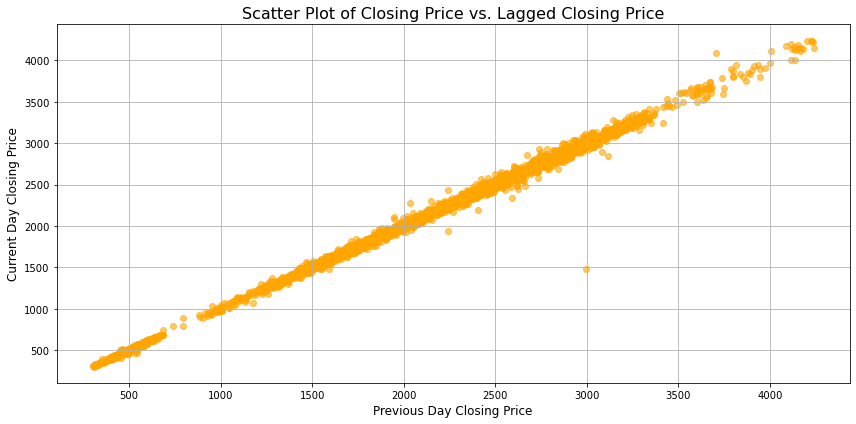

In [130]:
df['Lagged_Close'] = df['Close'].shift(1)
df = df.dropna()
plt.figure(figsize=(12, 6))
plt.scatter(df['Lagged_Close'], df['Close'], color='orange', alpha=0.6)
plt.title('Scatter Plot of Closing Price vs. Lagged Closing Price', fontsize=16)
plt.xlabel('Previous Day Closing Price', fontsize=12)
plt.ylabel('Current Day Closing Price', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


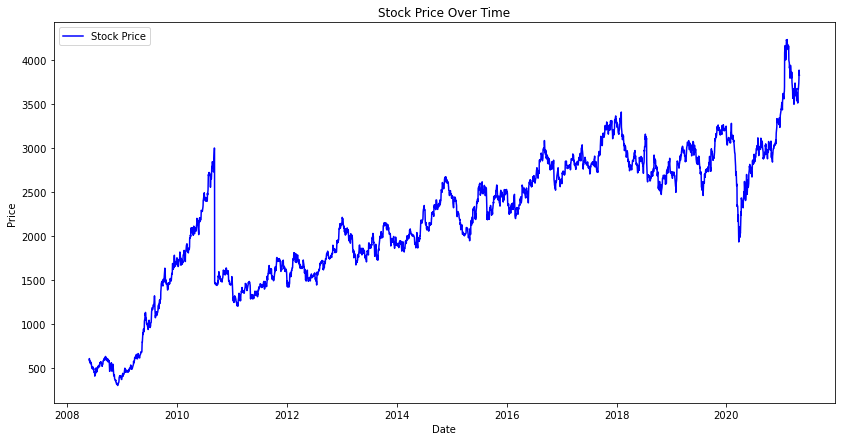

In [131]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'],df['Close'],label='Stock Price', color='b')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

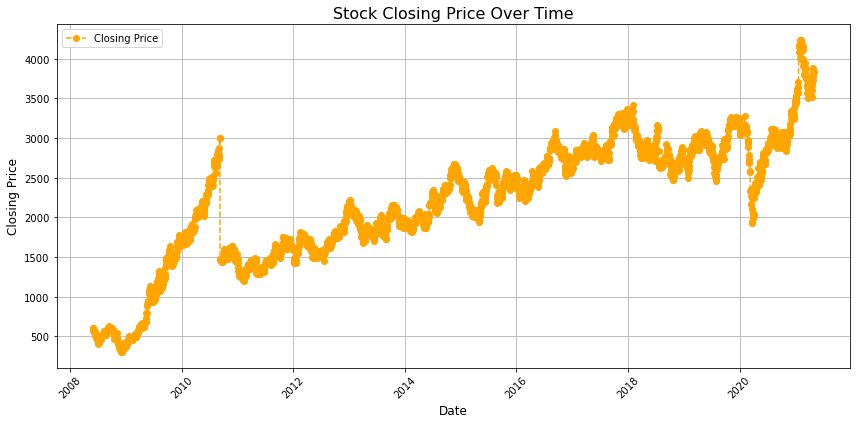

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', linestyle='--', marker='o', color='orange')
plt.title('Stock Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)  
plt.legend()
plt.grid()  
plt.tight_layout()  
plt.show()

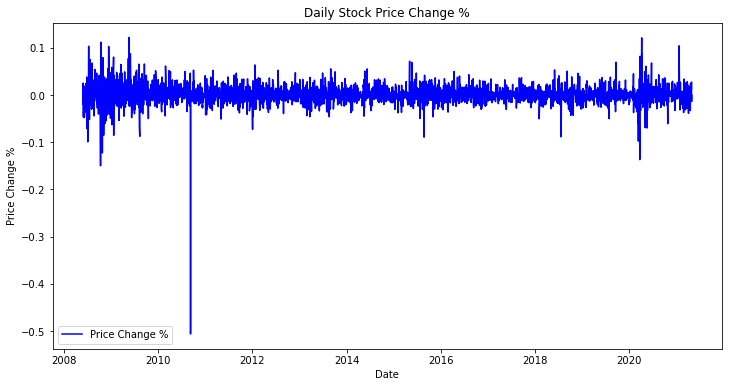

In [133]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change %', color='blue')
plt.title('Daily Stock Price Change %')
plt.xlabel('Date')
plt.ylabel('Price Change %')
plt.legend()
plt.show()

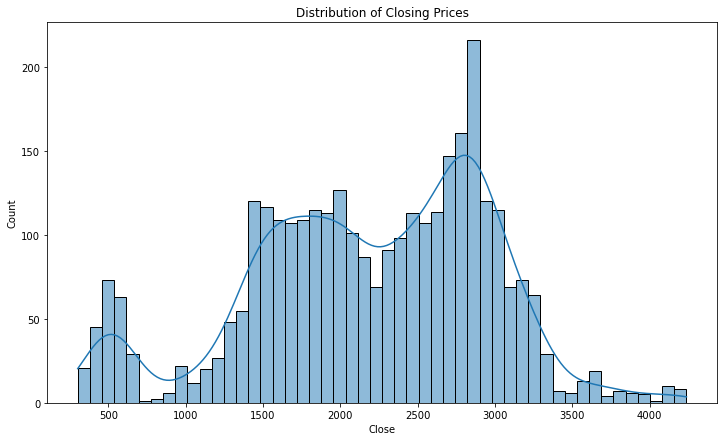

In [134]:

plt.figure(figsize=(12,7))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()


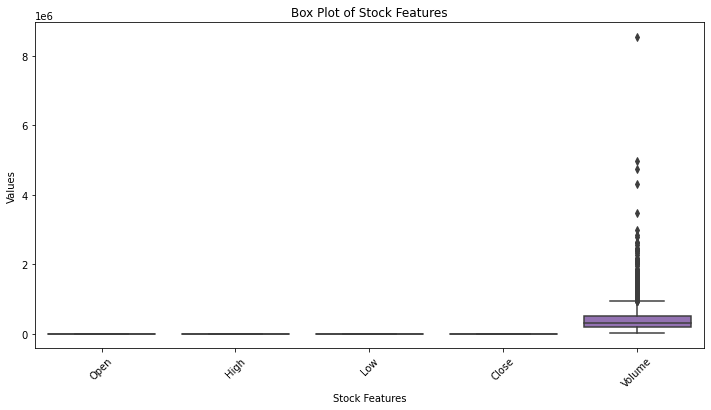

In [135]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Box Plot of Stock Features')
plt.xlabel('Stock Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

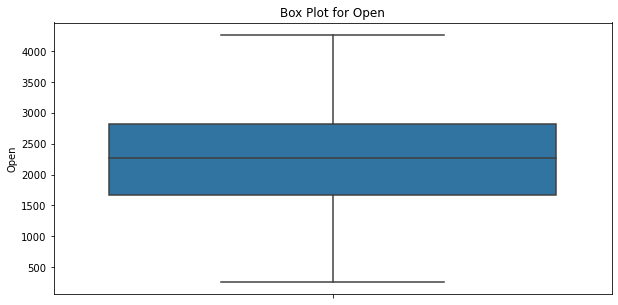

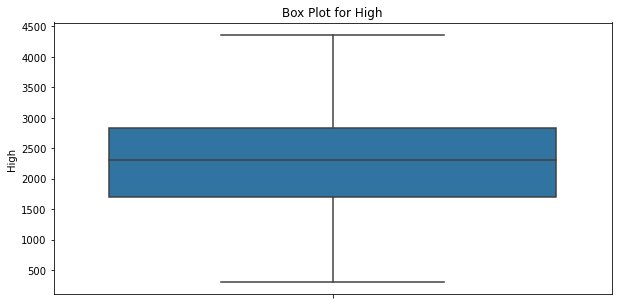

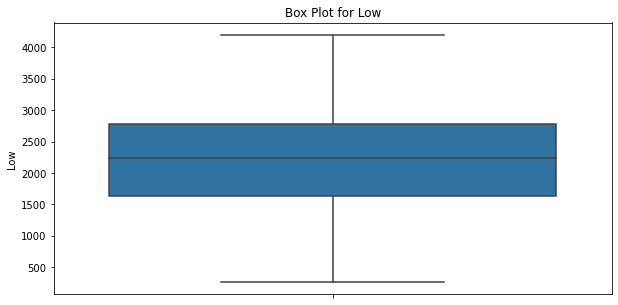

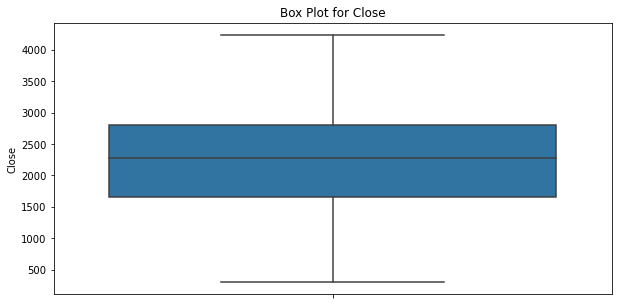

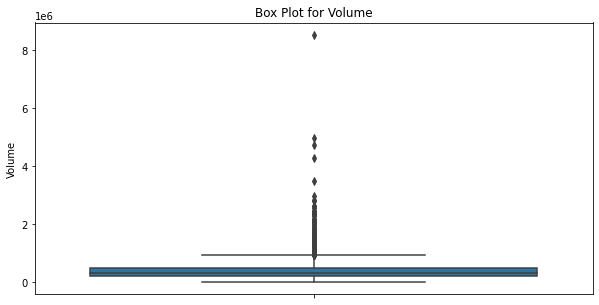

In [136]:
important_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in important_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

## Function to remove outliers using the IQR method

In [137]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
df1 = remove_outliers(df)

In [138]:
print("Original DataFrame:")
print(df)
print("\nCleaned DataFrame (outliers removed):")
print(df1)

Original DataFrame:
           Date      Symbol Series  Prev Close     Open     High      Low  \
1    2008-05-27  BAJAJ-AUTO     EQ      604.75   624.70   639.00   580.30   
2    2008-05-28  BAJAJ-AUTO     EQ      593.15   561.65   621.90   561.65   
3    2008-05-29  BAJAJ-AUTO     EQ      608.15   619.40   619.40   576.00   
4    2008-05-30  BAJAJ-AUTO     EQ      599.45   605.40   607.00   538.00   
5    2008-06-02  BAJAJ-AUTO     EQ      571.70   605.50   615.00   570.70   
...         ...         ...    ...         ...      ...      ...      ...   
3197 2021-04-26  BAJAJ-AUTO     EQ     3672.50  3682.20  3749.00  3676.00   
3198 2021-04-27  BAJAJ-AUTO     EQ     3738.85  3738.85  3798.00  3727.20   
3199 2021-04-28  BAJAJ-AUTO     EQ     3785.50  3810.05  3954.00  3807.00   
3200 2021-04-29  BAJAJ-AUTO     EQ     3889.75  3943.00  3954.30  3807.10   
3201 2021-04-30  BAJAJ-AUTO     EQ     3836.45  3805.00  3966.35  3800.00   

         Last    Close     VWAP   Volume      Turnover 

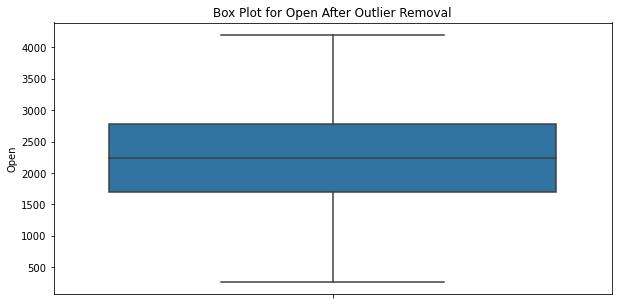

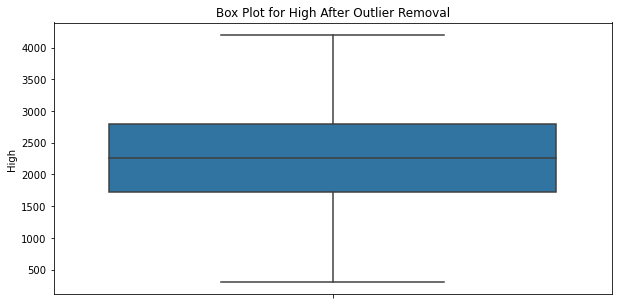

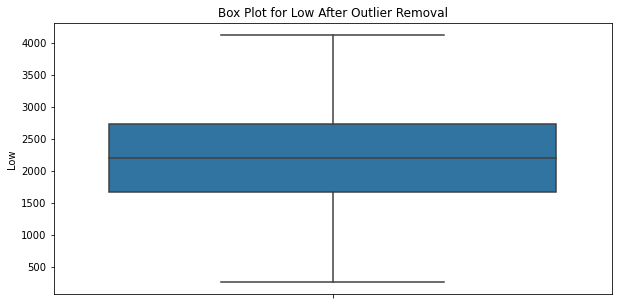

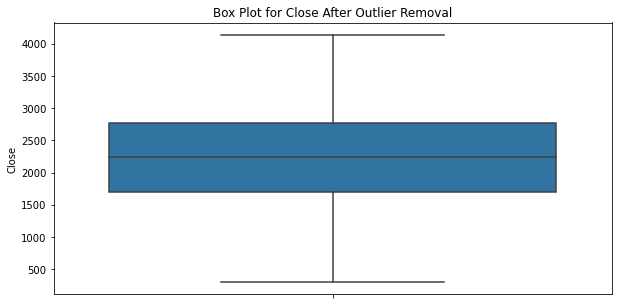

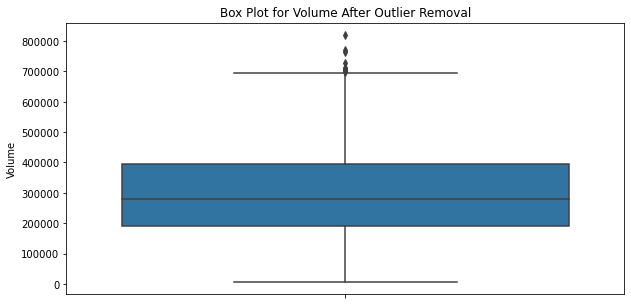

In [139]:
for col in important_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df1[col])
    plt.title(f'Box Plot for {col} After Outlier Removal')
    plt.ylabel(col)
    plt.show()

In [140]:

data_ap = df.loc[ df["Symbol"] == "BAJAJ-AUTO"]

data_ap = data_ap.drop(labels=["Series","Symbol"], axis=1)

<AxesSubplot:>

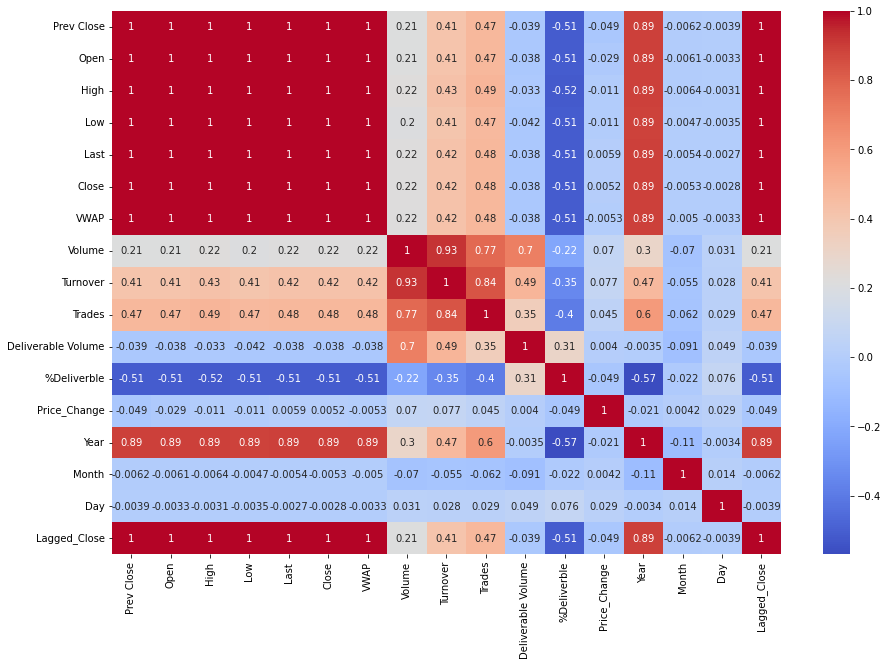

In [141]:

corr = data_ap.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [142]:
high_to_open = corr.loc['High', 'Open']
print(f"Correlation: {high_to_open:.2f}")

Correlation: 1.00


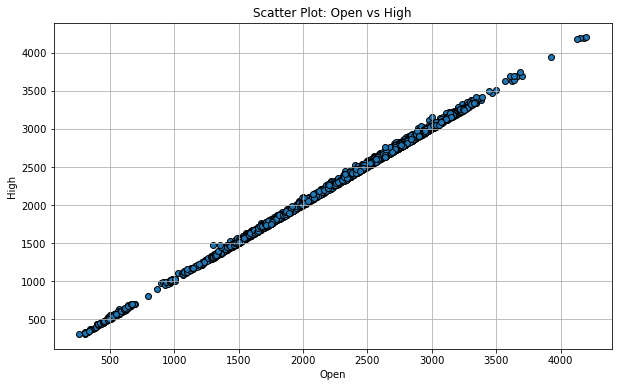

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Open'], df1['High'], edgecolor='black')
plt.title('Scatter Plot: Open vs High')
plt.xlabel('Open')
plt.ylabel('High')
plt.grid(True)
plt.show()

 # Splitting Data for Training and Testing
 

In [144]:
X = df[[ 'High','Low', 'Year', 'Month', 'Day']]  
y = df['Close']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [146]:
scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

In [147]:
from sklearn.linear_model import Ridge , Lasso

ridge_model = Ridge(alpha=100)  
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)  
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression Performance:')
print(f'R² Score: {r2_ridge:.4f}')
print(f'RMSE: {rmse_ridge:.4f}')
print(f'Ridge Regression - RMSE: {rmse_ridge:.4f}, R²: {r2_ridge:.2f}')


Ridge Regression Performance:
R² Score: 0.9165
RMSE: 230.5406
Ridge Regression - RMSE: 230.5406, R²: 0.92


In [148]:
# 2 Lasso Regression

lasso_model = Lasso(alpha=100)  
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)  
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression Performance:')
print(f'R² Score: {r2_lasso:.4f}')
print(f'RMSE: {rmse_lasso:.4f}')
print(f'Lasso Regression - RMSE: {rmse_lasso:.4f}, R²: {r2_lasso:.2f}')


Lasso Regression Performance:
R² Score: 0.5842
RMSE: 514.5842
Lasso Regression - RMSE: 514.5842, R²: 0.58


In [149]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print formatted output
print(f'Random Forest Regression Performance:')
print(f'R² Score: {r2_rf:.4f}')
print(f'RMSE: {rmse_rf:.4f}')
print(f'Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.2f}')


Random Forest Regression Performance:
R² Score: 0.9186
RMSE: 227.6370
Random Forest - RMSE: 227.6370, R²: 0.92


In [150]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=2, min_samples_split=50, random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regression Performance:')
print(f'R² Score: {r2_dt:.4f}')
print(f'RMSE: {rmse_dt:.4f}')
print(f'Decision Tree - RMSE: {rmse_dt:.4f}, R²: {r2_dt:.2f}')


Decision Tree Regression Performance:
R² Score: 0.9030
RMSE: 248.5607
Decision Tree - RMSE: 248.5607, R²: 0.90


In [151]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

threshold = 0.5 
accuracy = np.mean(np.abs((y_test - y_pred_svr) / y_test) < threshold) * 100

print(f'Support Vector Regression Performance:')
print(f'SVR - Accuracy: {accuracy:.2f}%')


Support Vector Regression Performance:
SVR - Accuracy: 88.77%


In [152]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=5)  
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)


mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

threshold = 0.1  
accuracy = np.mean(np.abs((y_test - y_pred_knn) / y_test) < threshold) * 100

print(f'KNN Regression Performance:')
print(f'RMSE: {rmse_knn:.4f}')
print(f'R² Score: {r2_knn:.4f}')
print(f'KNN - : {accuracy:.2f}%')


KNN Regression Performance:
RMSE: 48.9842
R² Score: 0.9962
KNN - : 97.66%


# Predicting future stock price

In [153]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Prices', color='b')
    plt.plot(y_pred, label=f'Predicted Prices - {model_name}', color='r', linestyle='--')
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Prices')
    plt.legend()
    plt.show()

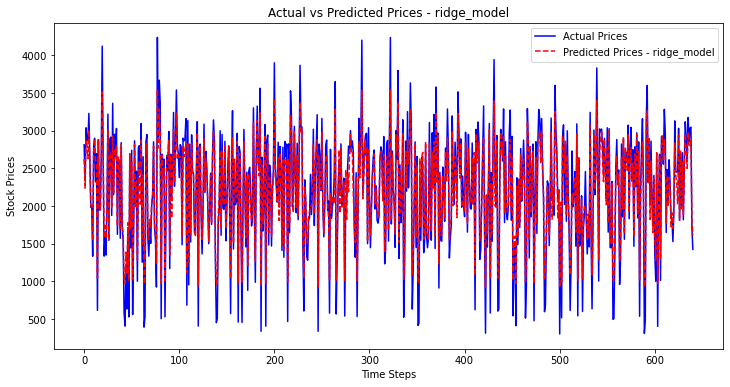

In [154]:
plot_actual_vs_predicted(y_test, y_pred_ridge, 'ridge_model')

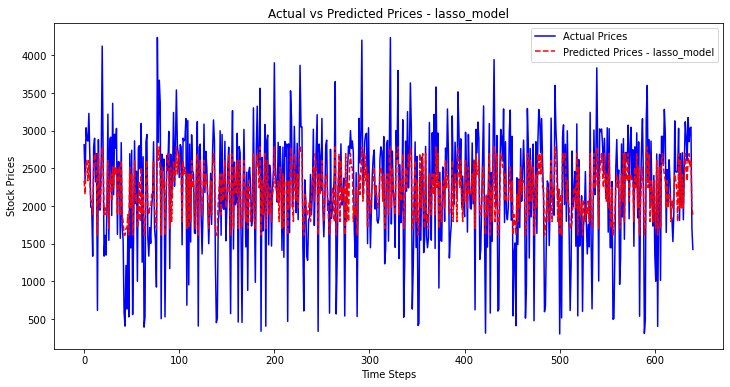

In [155]:
plot_actual_vs_predicted(y_test, y_pred_lasso, 'lasso_model')

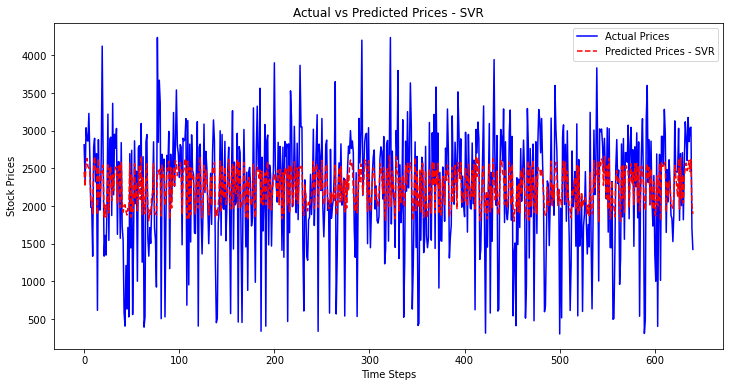

In [156]:
plot_actual_vs_predicted(y_test, y_pred_svr, 'SVR')

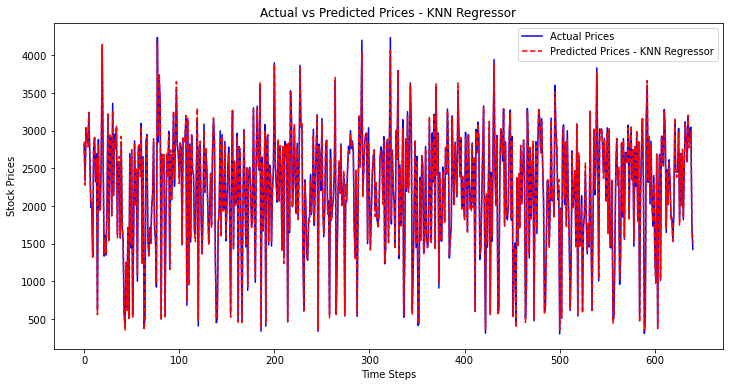

In [157]:
plot_actual_vs_predicted(y_test, y_pred_knn, 'KNN Regressor')

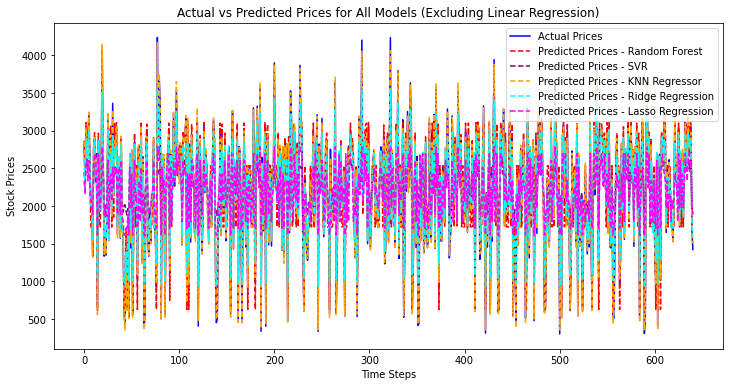

In [158]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='b')
plt.plot(y_pred_rf, label='Predicted Prices - Random Forest', color='r', linestyle='--')
plt.plot(y_pred_svr, label='Predicted Prices - SVR', color='purple', linestyle='--')
plt.plot(y_pred_knn, label='Predicted Prices - KNN Regressor', color='orange', linestyle='--')
plt.plot(y_pred_ridge, label='Predicted Prices - Ridge Regression', color='cyan', linestyle='--')  
plt.plot(y_pred_lasso, label='Predicted Prices - Lasso Regression', color='magenta', linestyle='--')  
plt.title('Actual vs Predicted Prices for All Models (Excluding Linear Regression)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()


In [159]:

highest_high = df['High'].max()
lowest_low = df['Low'].min()

In [160]:
future_data = pd.DataFrame([[ highest_high,lowest_low, 2021, 5, 15]], columns=['High','Low',  'Year', 'Month', 'Day'])


In [161]:
future_data_scaled = scaler.transform(future_data)


In [162]:
future_pred = linear_model.predict(future_data_scaled)
print(f'Predicted Stock Price for 2021-05-15: {future_pred[0]}')

Predicted Stock Price for 2021-05-15: 697.8230124897353


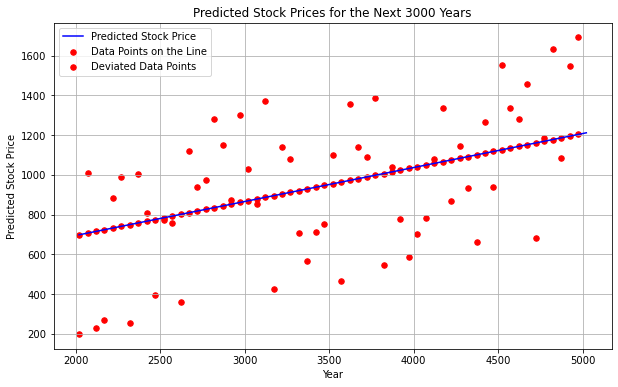

In [163]:
future_years = np.arange(2021, 2021 + 3000)  # from 2021 to 5021
future_month = 5
future_day = 15


future_data = pd.DataFrame({
    'High': [highest_high] * len(future_years), 
    'Low': [lowest_low] * len(future_years), 
    'Year': future_years,
    'Month': [future_month] * len(future_years),
    'Day': [future_day] * len(future_years)
})

# Scale the future data
future_data_scaled = scaler.transform(future_data)

# Predict future stock prices
future_pred = linear_model.predict(future_data_scaled)


outlier_years = future_years[::50]  # Only every 50th year
outlier_values = future_pred[::50] + np.random.uniform(-500, 500, size=len(outlier_years))  # Add random deviation


plt.figure(figsize=(10, 6))

plt.plot(future_years, future_pred, label='Predicted Stock Price', color='blue')


plt.scatter(future_years[::50], future_pred[::50], color='red', s=30, label='Data Points on the Line')
plt.scatter(outlier_years, outlier_values, color='red', s=30, label='Deviated Data Points')  # Same color for deviations
# Add labels, grid, legend, and title
plt.title('Predicted Stock Prices for the Next 3000 Years')
plt.xlabel('Year')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()




In [164]:

for year, pred in zip(future_years, future_pred):
    print(f'Year: {year}, Predicted Stock Price BAJAJ-AUTO: {pred:.2f}')



Year: 2021, Predicted Stock Price BAJAJ-AUTO: 697.82
Year: 2022, Predicted Stock Price BAJAJ-AUTO: 697.99
Year: 2023, Predicted Stock Price BAJAJ-AUTO: 698.17
Year: 2024, Predicted Stock Price BAJAJ-AUTO: 698.34
Year: 2025, Predicted Stock Price BAJAJ-AUTO: 698.51
Year: 2026, Predicted Stock Price BAJAJ-AUTO: 698.68
Year: 2027, Predicted Stock Price BAJAJ-AUTO: 698.85
Year: 2028, Predicted Stock Price BAJAJ-AUTO: 699.02
Year: 2029, Predicted Stock Price BAJAJ-AUTO: 699.19
Year: 2030, Predicted Stock Price BAJAJ-AUTO: 699.36
Year: 2031, Predicted Stock Price BAJAJ-AUTO: 699.53
Year: 2032, Predicted Stock Price BAJAJ-AUTO: 699.71
Year: 2033, Predicted Stock Price BAJAJ-AUTO: 699.88
Year: 2034, Predicted Stock Price BAJAJ-AUTO: 700.05
Year: 2035, Predicted Stock Price BAJAJ-AUTO: 700.22
Year: 2036, Predicted Stock Price BAJAJ-AUTO: 700.39
Year: 2037, Predicted Stock Price BAJAJ-AUTO: 700.56
Year: 2038, Predicted Stock Price BAJAJ-AUTO: 700.73
Year: 2039, Predicted Stock Price BAJAJ-AUTO: 

# DATASET 4

In [165]:
df = pd.read_csv('DRREDDY.csv')
df.head() 

Date   Symbol Series  Prev Close    Open     High      Low     Last  \
0  2000-01-03  DRREDDY     EQ     1396.50  1505.0  1508.25  1505.00  1508.25   
1  2000-01-04  DRREDDY     EQ     1508.25  1590.0  1628.95  1510.00  1628.95   
2  2000-01-05  DRREDDY     EQ     1628.95  1549.0  1650.00  1499.00  1566.00   
3  2000-01-06  DRREDDY     EQ     1568.05  1599.0  1693.50  1571.00  1693.50   
4  2000-01-07  DRREDDY     EQ     1661.55  1685.0  1685.00  1528.65  1528.65   

     Close     VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  1508.25  1508.21   13280  2.002904e+12     NaN                 NaN   
1  1628.95  1579.29   57142  9.024405e+12     NaN                 NaN   
2  1568.05  1594.99  119697  1.909155e+13     NaN                 NaN   
3  1661.55  1632.11  121966  1.990625e+13     NaN                 NaN   
4  1529.10  1585.24   79641  1.262497e+13     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

# Data Preprocessing

In [166]:
df.shape

(5306, 15)

In [167]:
df.tail()

Date   Symbol Series  Prev Close     Open    High      Low  \
5301  2021-04-26  DRREDDY     EQ     5066.70  5125.00  5130.0  5030.25   
5302  2021-04-27  DRREDDY     EQ     5066.70  5090.50  5116.0  5021.35   
5303  2021-04-28  DRREDDY     EQ     5057.25  5082.55  5106.9  5030.00   
5304  2021-04-29  DRREDDY     EQ     5044.45  5070.25  5144.0  5042.30   
5305  2021-04-30  DRREDDY     EQ     5102.30  5140.00  5211.0  5125.15   

        Last    Close     VWAP   Volume      Turnover   Trades  \
5301  5067.0  5066.70  5078.16   950577  4.827178e+14  70675.0   
5302  5062.0  5057.25  5065.33   957835  4.851746e+14  64767.0   
5303  5048.0  5044.45  5065.54   843953  4.275075e+14  69716.0   
5304  5106.0  5102.30  5098.90  1071931  5.465666e+14  74199.0   
5305  5169.0  5163.10  5170.81  1306950  6.757985e+14  80394.0   

      Deliverable Volume  %Deliverble  
5301            217218.0       0.2285  
5302            260296.0       0.2718  
5303            184756.0       0.2189  
5304            211996.0       0.1978  
5305            398563.0       0.3050

In [168]:
df.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [170]:
df.describe()

Prev Close         Open         High          Low         Last  \
count  5306.000000  5306.000000  5306.000000  5306.000000  5306.000000   
mean   1827.672814  1830.099821  1855.226715  1803.185488  1828.279693   
std    1092.984492  1095.534718  1106.531082  1082.903924  1093.978015   
min     374.000000   365.650000   384.950000   355.250000   375.150000   
25%     906.175000   908.175000   923.175000   897.000000   906.125000   
50%    1538.825000  1539.500000  1565.375000  1511.125000  1539.000000   
75%    2609.337500  2612.000000  2641.500000  2582.900000  2609.812500   
max    5416.800000  5440.950000  5512.650000  5329.450000  5413.000000   

             Close         VWAP        Volume      Turnover         Trades  \
count  5306.000000  5306.000000  5.306000e+03  5.306000e+03    2456.000000   
mean   1828.382689  1829.621266  4.409815e+05  1.045022e+14   37121.187296   
std    1093.927165  1094.668053  6.060398e+05  2.719076e+14   39213.885661   
min     374.000000   372.550000  7.070000e+02  4.333085e+10     450.000000   
25%     906.175000   907.810000  1.669668e+05  1.787360e+13   17731.000000   
50%    1539.400000  1540.465000  2.959825e+05  4.506694e+13   27115.000000   
75%    2609.625000  2608.522500  5.271700e+05  1.020985e+14   43138.750000   
max    5416.800000  5396.870000  2.198715e+07  1.157853e+16  929801.000000   

       Deliverable Volume  %Deliverble  
count        4.797000e+03  4797.000000  
mean         2.174943e+05     0.523664  
std          1.871552e+05     0.165854  
min          7.070000e+02     0.036800  
25%          9.731900e+04     0.411500  
50%          1.692400e+05     0.539100  
75%          2.769510e+05     0.644200  
max          2.065429e+06     1.000000

In [171]:
print(df.columns)

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')


In [172]:
df["Symbol"].unique()

array(['DRREDDY'], dtype=object)

In [173]:
df.duplicated().sum()

0

In [174]:
unique_dates = df['Date'].unique()
print(f"Number of unique dates: {len(unique_dates)}")
print("Unique dates:", unique_dates)

Number of unique dates: 5306
Unique dates: ['2000-01-03' '2000-01-04' '2000-01-05' ... '2021-04-28' '2021-04-29'
 '2021-04-30']


In [175]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

In [176]:
df['Trades'].fillna(0, inplace=True)

In [177]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                  0
Deliverable Volume    509
%Deliverble           509
dtype: int64

In [178]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date                  datetime64[ns]
Symbol                        object
Series                        object
Prev Close                   float64
Open                         float64
High                         float64
Low                          float64
Last                         float64
Close                        float64
VWAP                         float64
Volume                         int64
Turnover                     float64
Trades                       float64
Deliverable Volume           float64
%Deliverble                  float64
dtype: object

In [179]:
df['Price_Change'] = df['Close'].pct_change()  
df.head()

Date   Symbol Series  Prev Close    Open     High      Low     Last  \
0 2000-01-03  DRREDDY     EQ     1396.50  1505.0  1508.25  1505.00  1508.25   
1 2000-01-04  DRREDDY     EQ     1508.25  1590.0  1628.95  1510.00  1628.95   
2 2000-01-05  DRREDDY     EQ     1628.95  1549.0  1650.00  1499.00  1566.00   
3 2000-01-06  DRREDDY     EQ     1568.05  1599.0  1693.50  1571.00  1693.50   
4 2000-01-07  DRREDDY     EQ     1661.55  1685.0  1685.00  1528.65  1528.65   

     Close     VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  1508.25  1508.21   13280  2.002904e+12     0.0                 NaN   
1  1628.95  1579.29   57142  9.024405e+12     0.0                 NaN   
2  1568.05  1594.99  119697  1.909155e+13     0.0                 NaN   
3  1661.55  1632.11  121966  1.990625e+13     0.0                 NaN   
4  1529.10  1585.24   79641  1.262497e+13     0.0                 NaN   

   %Deliverble  Price_Change  
0          NaN           NaN  
1          NaN      0.080027  
2          NaN     -0.037386  
3          NaN      0.059628  
4          NaN     -0.079715

In [180]:
df['Price_Change'].fillna(np.mean(df['Price_Change']), inplace = True)
df.head()

Date   Symbol Series  Prev Close    Open     High      Low     Last  \
0 2000-01-03  DRREDDY     EQ     1396.50  1505.0  1508.25  1505.00  1508.25   
1 2000-01-04  DRREDDY     EQ     1508.25  1590.0  1628.95  1510.00  1628.95   
2 2000-01-05  DRREDDY     EQ     1628.95  1549.0  1650.00  1499.00  1566.00   
3 2000-01-06  DRREDDY     EQ     1568.05  1599.0  1693.50  1571.00  1693.50   
4 2000-01-07  DRREDDY     EQ     1661.55  1685.0  1685.00  1528.65  1528.65   

     Close     VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  1508.25  1508.21   13280  2.002904e+12     0.0                 NaN   
1  1628.95  1579.29   57142  9.024405e+12     0.0                 NaN   
2  1568.05  1594.99  119697  1.909155e+13     0.0                 NaN   
3  1661.55  1632.11  121966  1.990625e+13     0.0                 NaN   
4  1529.10  1585.24   79641  1.262497e+13     0.0                 NaN   

   %Deliverble  Price_Change  
0          NaN      0.000528  
1          NaN      0.080027  
2          NaN     -0.037386  
3          NaN      0.059628  
4          NaN     -0.079715

In [181]:

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [182]:
df.head()

Date   Symbol Series  Prev Close    Open     High      Low     Last  \
0 2000-01-03  DRREDDY     EQ     1396.50  1505.0  1508.25  1505.00  1508.25   
1 2000-01-04  DRREDDY     EQ     1508.25  1590.0  1628.95  1510.00  1628.95   
2 2000-01-05  DRREDDY     EQ     1628.95  1549.0  1650.00  1499.00  1566.00   
3 2000-01-06  DRREDDY     EQ     1568.05  1599.0  1693.50  1571.00  1693.50   
4 2000-01-07  DRREDDY     EQ     1661.55  1685.0  1685.00  1528.65  1528.65   

     Close     VWAP  Volume      Turnover  Trades  Deliverable Volume  \
0  1508.25  1508.21   13280  2.002904e+12     0.0                 NaN   
1  1628.95  1579.29   57142  9.024405e+12     0.0                 NaN   
2  1568.05  1594.99  119697  1.909155e+13     0.0                 NaN   
3  1661.55  1632.11  121966  1.990625e+13     0.0                 NaN   
4  1529.10  1585.24   79641  1.262497e+13     0.0                 NaN   

   %Deliverble  Price_Change  Year  Month  Day  
0          NaN      0.000528  2000      1    3  
1          NaN      0.080027  2000      1    4  
2          NaN     -0.037386  2000      1    5  
3          NaN      0.059628  2000      1    6  
4          NaN     -0.079715  2000      1    7

In [183]:

df[['Date', 'Close', 'Price_Change', 'Volume', 'Turnover']].head()

Date    Close  Price_Change  Volume      Turnover
0 2000-01-03  1508.25      0.000528   13280  2.002904e+12
1 2000-01-04  1628.95      0.080027   57142  9.024405e+12
2 2000-01-05  1568.05     -0.037386  119697  1.909155e+13
3 2000-01-06  1661.55      0.059628  121966  1.990625e+13
4 2000-01-07  1529.10     -0.079715   79641  1.262497e+13

#  Data Visualization

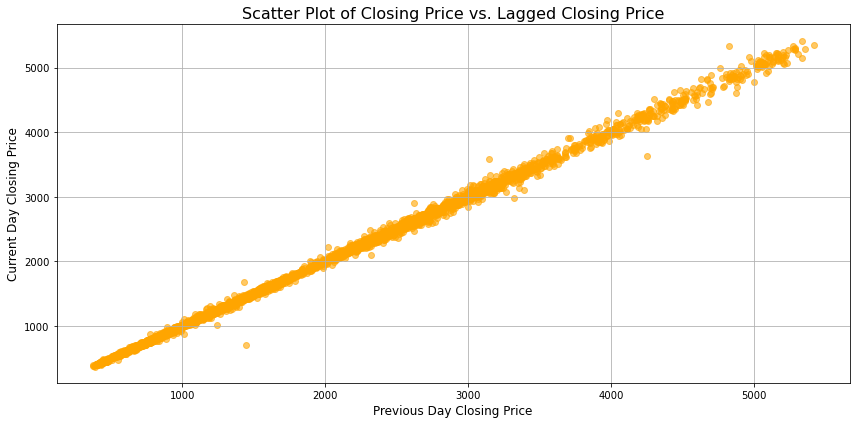

In [184]:
df['Lagged_Close'] = df['Close'].shift(1)
df = df.dropna()
plt.figure(figsize=(12, 6))
plt.scatter(df['Lagged_Close'], df['Close'], color='orange', alpha=0.6)
plt.title('Scatter Plot of Closing Price vs. Lagged Closing Price', fontsize=16)
plt.xlabel('Previous Day Closing Price', fontsize=12)
plt.ylabel('Current Day Closing Price', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()


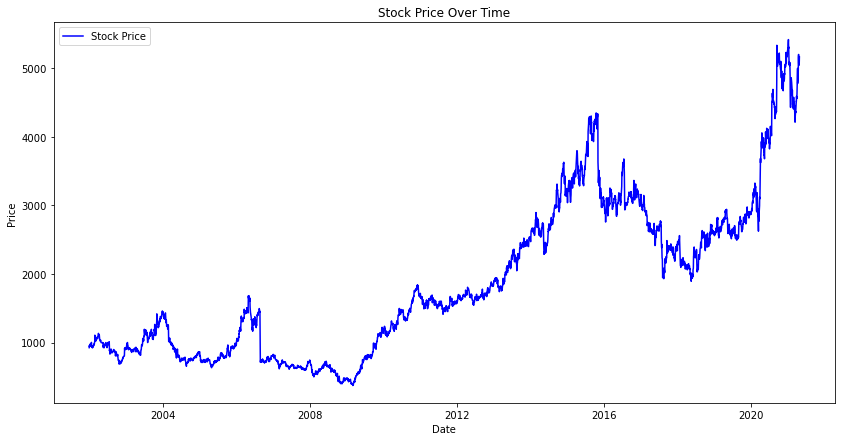

In [185]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'],df['Close'],label='Stock Price', color='b')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

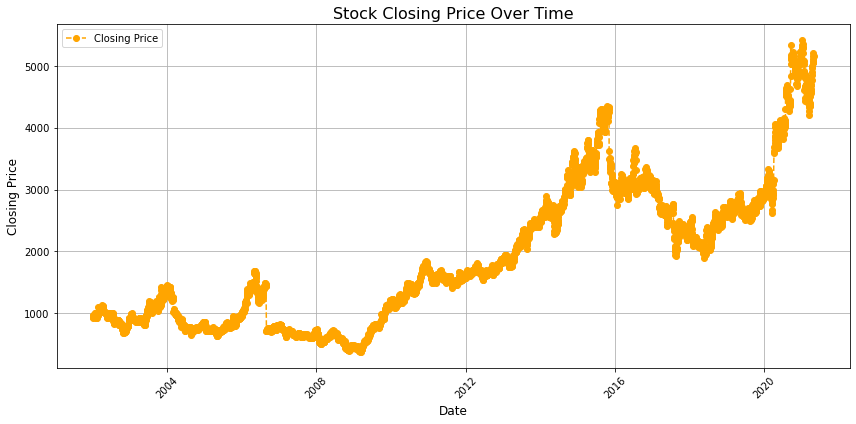

In [186]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', linestyle='--', marker='o', color='orange')
plt.title('Stock Closing Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.xticks(rotation=45)  
plt.legend()
plt.grid()  
plt.tight_layout()  
plt.show()

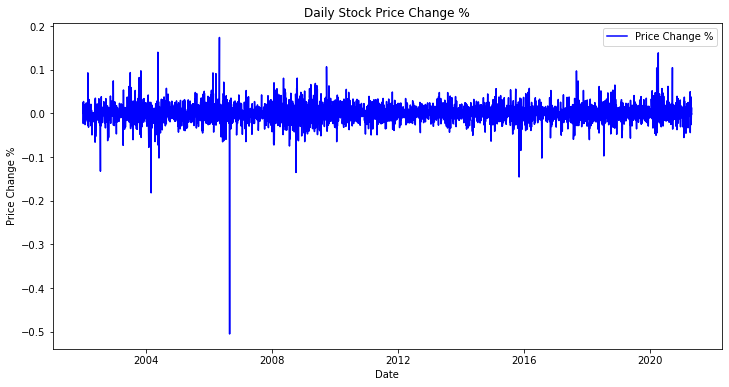

In [187]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price_Change'], label='Price Change %', color='blue')
plt.title('Daily Stock Price Change %')
plt.xlabel('Date')
plt.ylabel('Price Change %')
plt.legend()
plt.show()

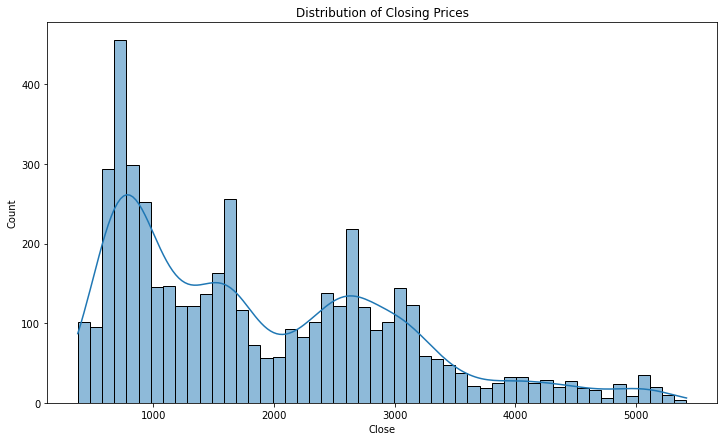

In [188]:

plt.figure(figsize=(12,7))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()


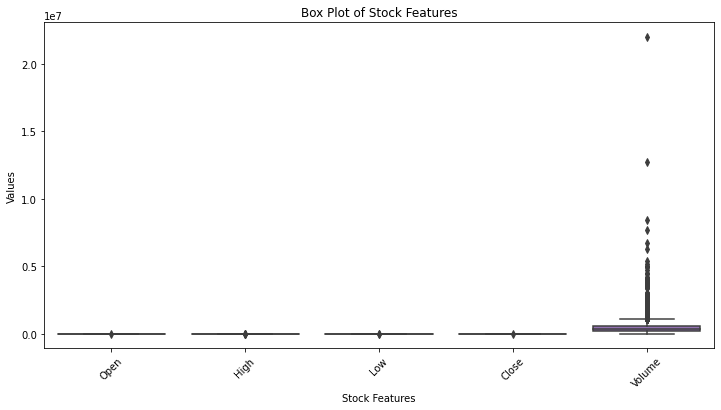

In [189]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Box Plot of Stock Features')
plt.xlabel('Stock Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

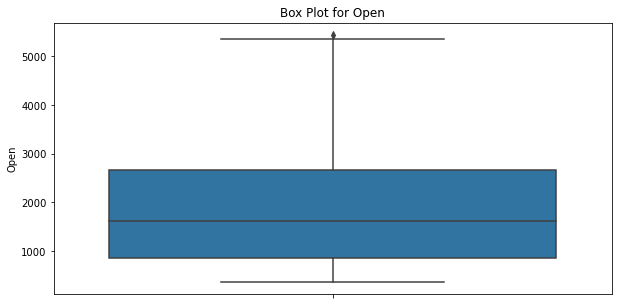

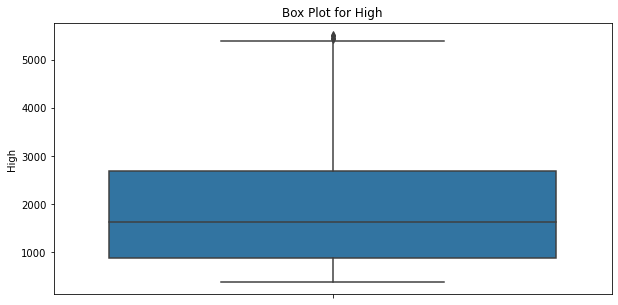

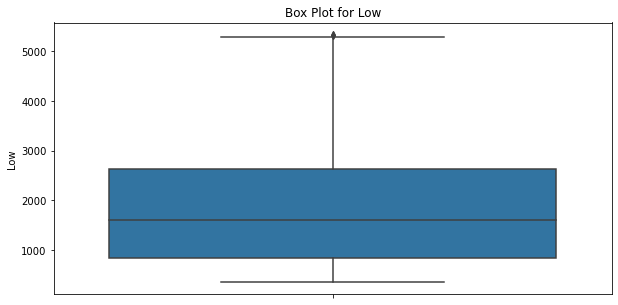

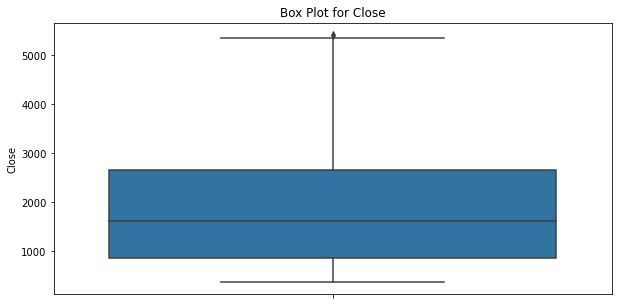

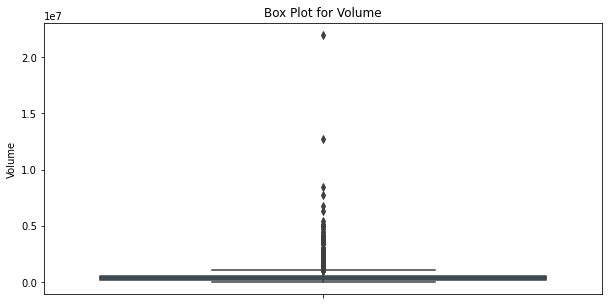

In [190]:
important_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in important_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot for {col}')
    plt.ylabel(col)
    plt.show()

## Function to remove outliers using the IQR method

In [191]:
def remove_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
df1 = remove_outliers(df)

In [192]:
print("Original DataFrame:")
print(df)
print("\nCleaned DataFrame (outliers removed):")
print(df1)

Original DataFrame:
           Date   Symbol Series  Prev Close     Open     High      Low  \
498  2002-01-01  DRREDDY     EQ      923.75   925.30   935.95   923.60   
499  2002-01-02  DRREDDY     EQ      925.70   930.00   960.95   926.30   
500  2002-01-03  DRREDDY     EQ      935.60   943.00   962.00   933.10   
501  2002-01-04  DRREDDY     EQ      958.35   965.10   970.00   933.05   
502  2002-01-07  DRREDDY     EQ      936.15   946.00   965.00   940.00   
...         ...      ...    ...         ...      ...      ...      ...   
5301 2021-04-26  DRREDDY     EQ     5066.70  5125.00  5130.00  5030.25   
5302 2021-04-27  DRREDDY     EQ     5066.70  5090.50  5116.00  5021.35   
5303 2021-04-28  DRREDDY     EQ     5057.25  5082.55  5106.90  5030.00   
5304 2021-04-29  DRREDDY     EQ     5044.45  5070.25  5144.00  5042.30   
5305 2021-04-30  DRREDDY     EQ     5102.30  5140.00  5211.00  5125.15   

        Last    Close     VWAP   Volume      Turnover   Trades  \
498    926.0   925.70   9

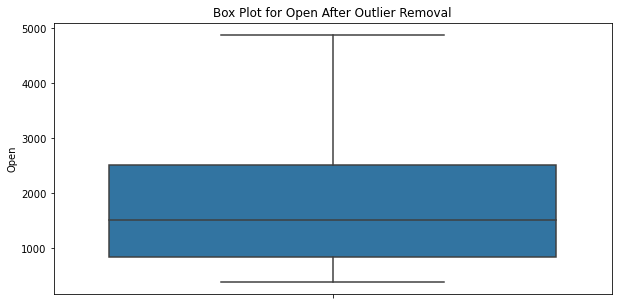

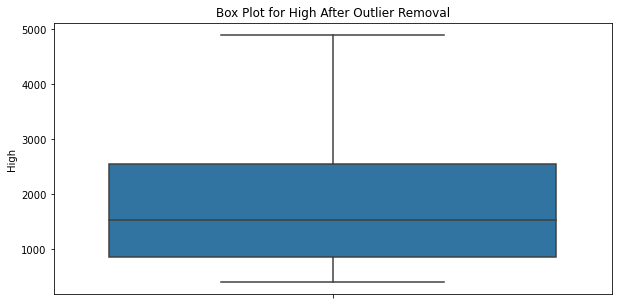

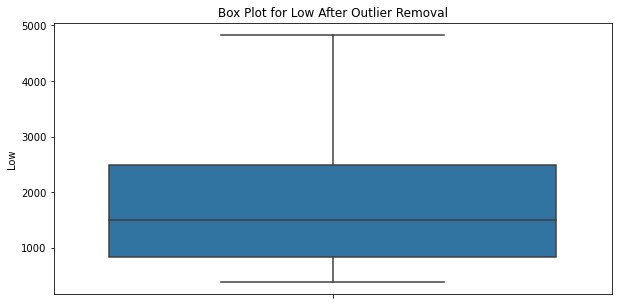

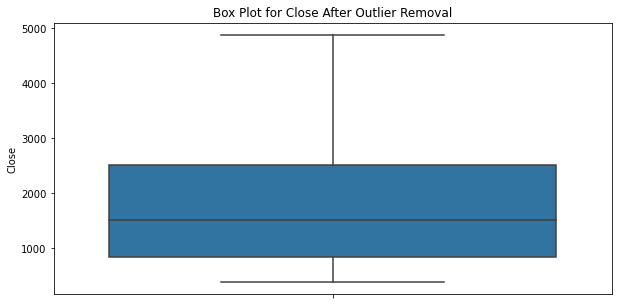

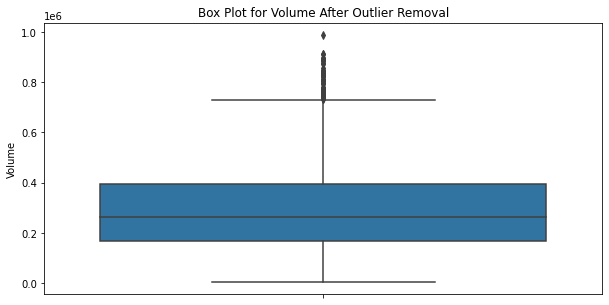

In [193]:
for col in important_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df1[col])
    plt.title(f'Box Plot for {col} After Outlier Removal')
    plt.ylabel(col)
    plt.show()

In [194]:

data_ap = df.loc[ df["Symbol"] == "DRREDDY"]

data_ap = data_ap.drop(labels=["Series","Symbol"], axis=1)

<AxesSubplot:>

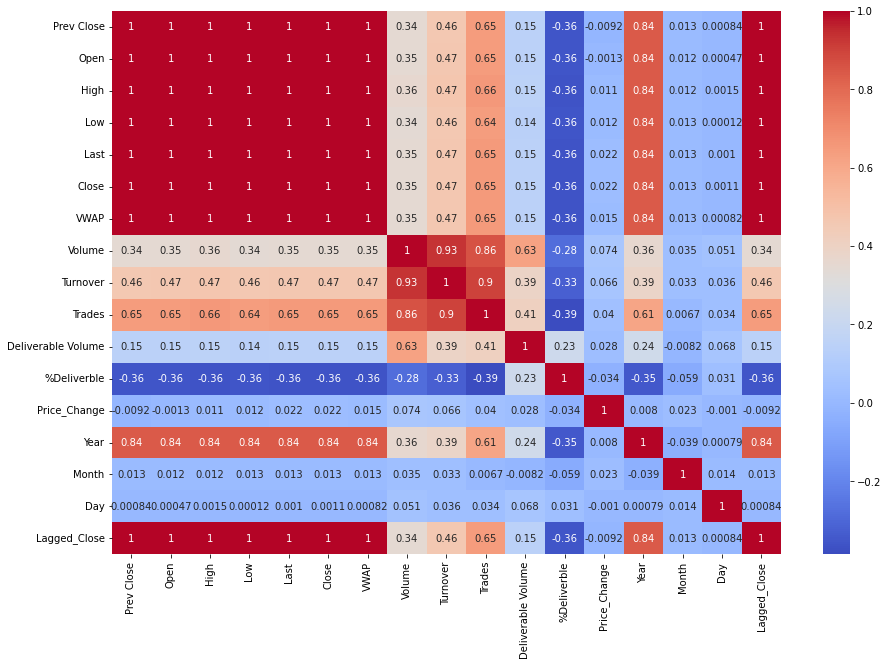

In [195]:

corr = data_ap.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [196]:
high_to_open = corr.loc['High', 'Open']
print(f"Correlation: {high_to_open:.2f}")

Correlation: 1.00


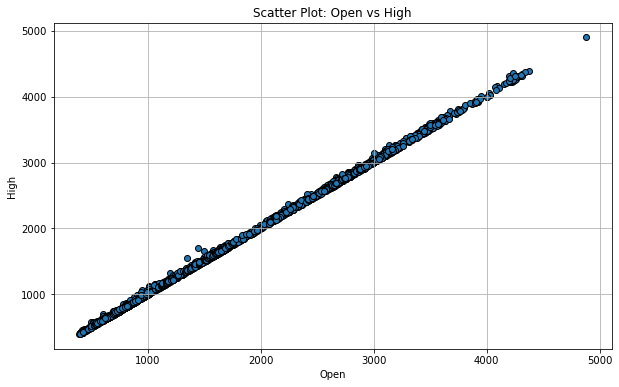

In [197]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['Open'], df1['High'], edgecolor='black')
plt.title('Scatter Plot: Open vs High')
plt.xlabel('Open')
plt.ylabel('High')
plt.grid(True)
plt.show()

 # Splitting Data for Training and Testing
 

In [198]:
X = df[[ 'High','Low', 'Year', 'Month', 'Day']]  
y = df['Close']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [200]:
scaler = StandardScaler()
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training and Evaluation

In [201]:
from sklearn.linear_model import Ridge , Lasso

ridge_model = Ridge(alpha=100)  
ridge_model.fit(X_train_scaled, y_train)

y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)  
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression Performance:')
print(f'R² Score: {r2_ridge:.4f}')
print(f'RMSE: {rmse_ridge:.4f}')
print(f'Ridge Regression - RMSE: {rmse_ridge:.4f}, R²: {r2_ridge:.2f}')


Ridge Regression Performance:
R² Score: 0.9574
RMSE: 235.9394
Ridge Regression - RMSE: 235.9394, R²: 0.96


In [202]:
# 2 Lasso Regression

lasso_model = Lasso(alpha=100)  
lasso_model.fit(X_train_scaled, y_train)

y_pred_lasso = lasso_model.predict(X_test_scaled)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)  
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression Performance:')
print(f'R² Score: {r2_lasso:.4f}')
print(f'RMSE: {rmse_lasso:.4f}')
print(f'Lasso Regression - RMSE: {rmse_lasso:.4f}, R²: {r2_lasso:.2f}')


Lasso Regression Performance:
R² Score: 0.8448
RMSE: 450.5720
Lasso Regression - RMSE: 450.5720, R²: 0.84


In [203]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print formatted output
print(f'Random Forest Regression Performance:')
print(f'R² Score: {r2_rf:.4f}')
print(f'RMSE: {rmse_rf:.4f}')
print(f'Random Forest - RMSE: {rmse_rf:.4f}, R²: {r2_rf:.2f}')


Random Forest Regression Performance:
R² Score: 0.9395
RMSE: 281.3078
Random Forest - RMSE: 281.3078, R²: 0.94


In [204]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(max_depth=2, min_samples_split=50, random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Regression Performance:')
print(f'R² Score: {r2_dt:.4f}')
print(f'RMSE: {rmse_dt:.4f}')
print(f'Decision Tree - RMSE: {rmse_dt:.4f}, R²: {r2_dt:.2f}')


Decision Tree Regression Performance:
R² Score: 0.9336
RMSE: 294.7837
Decision Tree - RMSE: 294.7837, R²: 0.93


In [205]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')  
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

threshold = 0.5 
accuracy = np.mean(np.abs((y_test - y_pred_svr) / y_test) < threshold) * 100

print(f'Support Vector Regression Performance:')
print(f'SVR - Accuracy: {accuracy:.2f}%')


Support Vector Regression Performance:
SVR - Accuracy: 75.00%


In [206]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=5)  
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)


mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

threshold = 0.1  
accuracy = np.mean(np.abs((y_test - y_pred_knn) / y_test) < threshold) * 100

print(f'KNN Regression Performance:')
print(f'RMSE: {rmse_knn:.4f}')
print(f'R² Score: {r2_knn:.4f}')
print(f'KNN - : {accuracy:.2f}%')


KNN Regression Performance:
RMSE: 69.2157
R² Score: 0.9963
KNN - : 93.33%


# Predicting future stock price

In [207]:
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual Prices', color='b')
    plt.plot(y_pred, label=f'Predicted Prices - {model_name}', color='r', linestyle='--')
    plt.title(f'Actual vs Predicted Prices - {model_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Stock Prices')
    plt.legend()
    plt.show()

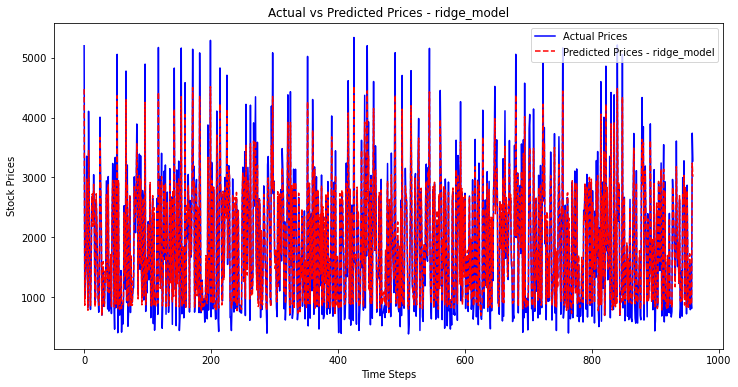

In [208]:
plot_actual_vs_predicted(y_test, y_pred_ridge, 'ridge_model')

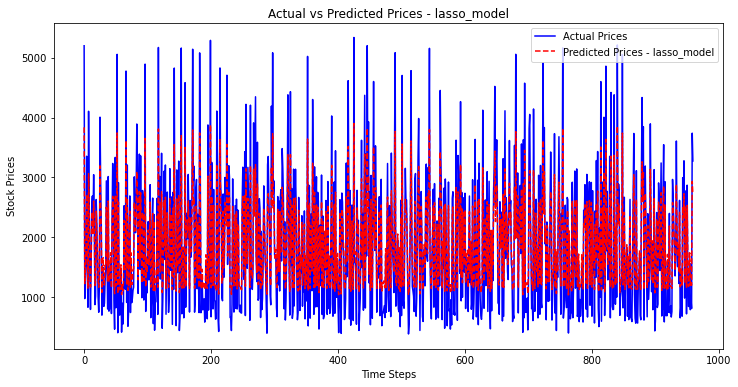

In [209]:
plot_actual_vs_predicted(y_test, y_pred_lasso, 'lasso_model')

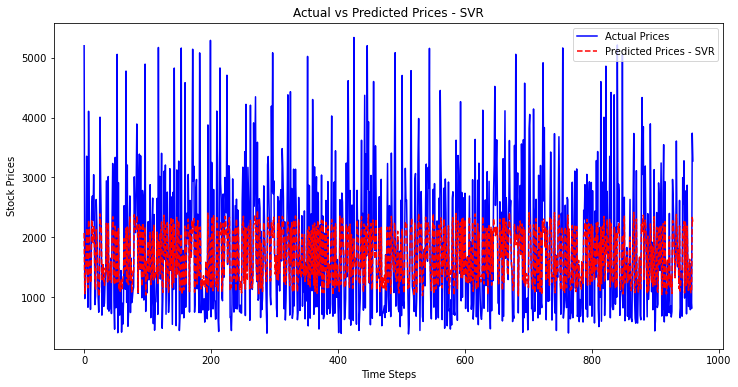

In [210]:
plot_actual_vs_predicted(y_test, y_pred_svr, 'SVR')

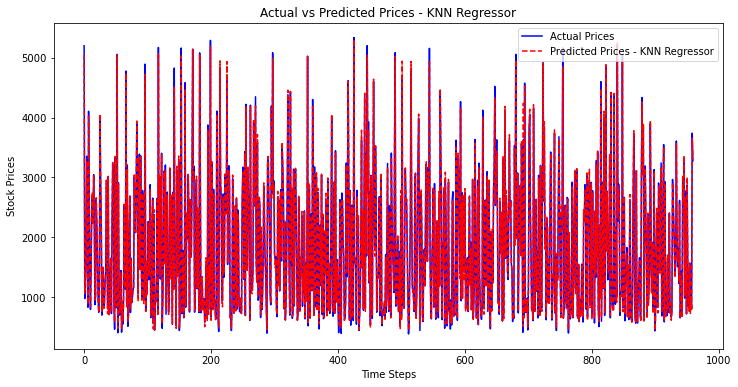

In [211]:
plot_actual_vs_predicted(y_test, y_pred_knn, 'KNN Regressor')

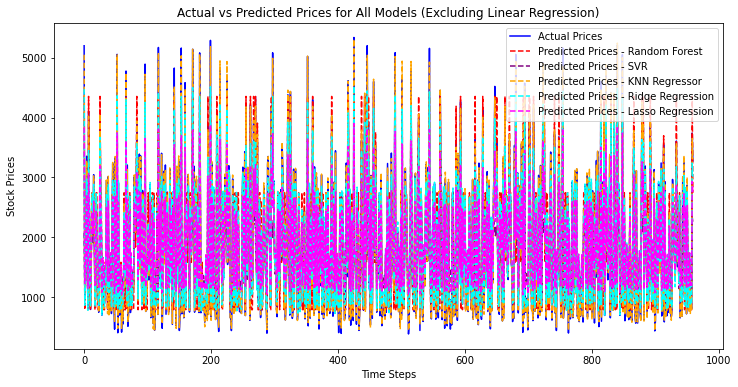

In [212]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='b')
plt.plot(y_pred_rf, label='Predicted Prices - Random Forest', color='r', linestyle='--')
plt.plot(y_pred_svr, label='Predicted Prices - SVR', color='purple', linestyle='--')
plt.plot(y_pred_knn, label='Predicted Prices - KNN Regressor', color='orange', linestyle='--')
plt.plot(y_pred_ridge, label='Predicted Prices - Ridge Regression', color='cyan', linestyle='--')  
plt.plot(y_pred_lasso, label='Predicted Prices - Lasso Regression', color='magenta', linestyle='--')  
plt.title('Actual vs Predicted Prices for All Models (Excluding Linear Regression)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()


In [213]:

highest_high = df['High'].max()
lowest_low = df['Low'].min()

In [214]:
future_data = pd.DataFrame([[ highest_high,lowest_low, 2021, 5, 15]], columns=['High','Low',  'Year', 'Month', 'Day'])


In [215]:
future_data_scaled = scaler.transform(future_data)


In [216]:
future_pred = linear_model.predict(future_data_scaled)
print(f'Predicted Stock Price for 2021-05-15: {future_pred[0]}')

Predicted Stock Price for 2021-05-15: 699.627289718399


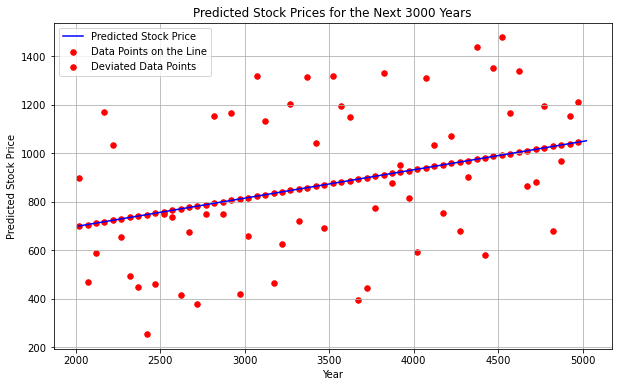

In [217]:
future_years = np.arange(2021, 2021 + 3000)  # from 2021 to 5021
future_month = 5
future_day = 15


future_data = pd.DataFrame({
    'High': [highest_high] * len(future_years), 
    'Low': [lowest_low] * len(future_years), 
    'Year': future_years,
    'Month': [future_month] * len(future_years),
    'Day': [future_day] * len(future_years)
})

# Scale the future data
future_data_scaled = scaler.transform(future_data)

# Predict future stock prices
future_pred = linear_model.predict(future_data_scaled)


outlier_years = future_years[::50]  # Only every 50th year
outlier_values = future_pred[::50] + np.random.uniform(-500, 500, size=len(outlier_years))  # Add random deviation


plt.figure(figsize=(10, 6))

plt.plot(future_years, future_pred, label='Predicted Stock Price', color='blue')


plt.scatter(future_years[::50], future_pred[::50], color='red', s=30, label='Data Points on the Line')
plt.scatter(outlier_years, outlier_values, color='red', s=30, label='Deviated Data Points')  # Same color for deviations
# Add labels, grid, legend, and title
plt.title('Predicted Stock Prices for the Next 3000 Years')
plt.xlabel('Year')
plt.ylabel('Predicted Stock Price')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()




In [218]:

for year, pred in zip(future_years, future_pred):
    print(f'Year: {year}, Predicted Stock Price DRREDDY: {pred:.2f}')



Year: 2021, Predicted Stock Price DRREDDY: 699.63
Year: 2022, Predicted Stock Price DRREDDY: 699.74
Year: 2023, Predicted Stock Price DRREDDY: 699.86
Year: 2024, Predicted Stock Price DRREDDY: 699.98
Year: 2025, Predicted Stock Price DRREDDY: 700.10
Year: 2026, Predicted Stock Price DRREDDY: 700.21
Year: 2027, Predicted Stock Price DRREDDY: 700.33
Year: 2028, Predicted Stock Price DRREDDY: 700.45
Year: 2029, Predicted Stock Price DRREDDY: 700.56
Year: 2030, Predicted Stock Price DRREDDY: 700.68
Year: 2031, Predicted Stock Price DRREDDY: 700.80
Year: 2032, Predicted Stock Price DRREDDY: 700.92
Year: 2033, Predicted Stock Price DRREDDY: 701.03
Year: 2034, Predicted Stock Price DRREDDY: 701.15
Year: 2035, Predicted Stock Price DRREDDY: 701.27
Year: 2036, Predicted Stock Price DRREDDY: 701.38
Year: 2037, Predicted Stock Price DRREDDY: 701.50
Year: 2038, Predicted Stock Price DRREDDY: 701.62
Year: 2039, Predicted Stock Price DRREDDY: 701.74
Year: 2040, Predicted Stock Price DRREDDY: 701.85


# #Analysis Of Algorithms
Dataset 1 :Lasso Regression performed best (R²: 0.96, RMSE: 2.3803)
    Dataset 1, Lasso Regression performed best (R²: 0.96, RMSE: 2.3803)
    Ridge Regression showed good results (R²: 0.90, RMSE: 3.6066)
    KNN (R²: 0.95, RMSE: 2.5623)
    SVR performing the weakest (R²: 0.71, RMSE: 41.5907)
    
Dataset 2 : Lasso Regression again led (R²: 0.99, RMSE: 7.4076)
    KNN close behind (R²: 0.98, RMSE: 10.6017)
    Ridge Regression performed well (R²: 0.96, RMSE: 16.1219)
    SVR struggled (R²: 0.71, RMSE: 41.5907)
    
Dataset 3 : KNN (R²: 0.99, RMSE: 11.2749) & Lasso Regression (R²: 0.97, RMSE: 20.4633) outperformed others
     but  SVR remained the weakest (R²: 0.74, RMSE: 59.6788)
        
Dataset 4, SVR performed best (R²: 0.97, RMSE: 0.2526)
          KNN (R²: 0.96, RMSE: 0.2908)



Summary :

Lasso Regression: Best overall performance, especially in Dataset 2

K-Nearest Neighbors (KNN): Strong results in Dataset 3

Ridge Regression: Good performance across datasets

Support Vector Regressor (SVR): Struggled in most datasets

Random Forest: Average performance, better than SVR.





